#Στοιχεία Ομάδας
##Ομάδα 35

#### - Καλτσογιάννης Δημήτρης       *03115628*
#### - Μάμαλη Αικατερίνη            *03116017*
#### - Τριανταφυλλόπουλος Ηλίας     *03116028*


#Μικρό Dataset

##Παρουσίαση συνόλου δεδομένων

Πρόκειται για ένα σύνολο δεδομένων που περιγράφουν μετρήσεις από έναν ανθρώπινο εγκέφαλο σε δύο καταστάσεις: **χαλάρωση** και **σχεδίαση**. Με τον όρο "σχεδίαση" εννοούμε ότι ζητήθηκε από το άτομο που συμμετείχε στο πείραμα να φανταστεί ότι κινεί το δεξί του αντίχειρα χωρίς πράγματι να τον κινήσει, δηλαδή να σχεδιάσει πνευματικά τη διαδικασία κίνησης. Με κατάλληλες συνδέσεις ηλεκτροδίων μετρήθηκε η απόκριση του εγκεφάλου στις δύο περιπτώσεις ως μία κυματομορφή. Στη συνέχεια, χρησιμοποιήθηκε ειδική μεθοδολογία για την εξαγωγή των χαρακτηριστικών της κυματομορφής.

Σύμφωνα με την [επίσημη ιστοσελίδα του dataset](http://archive.ics.uci.edu/ml/datasets/Planning+Relax), το σύνολο δεδομένων που θα μελετήσουμε περιέχει 182 δεδομένα με 13 χαρακτηριστικά το καθένα. Από αυτά τα 13 χαρακτηριστικά τα 12 είναι τα πραγματικά, ενώ το ένα αντιστοιχεί στο **label**, δηλαδή το είδος της απόκρισης στην οποία αντιστοιχούν αυτά τα χαρακτηριστικά όπως προκύπτει από το πείραμα.
Όλα τα χαρακτηριστικά είναι πραγματικές τιμές και έχουν προκυψει μεσω της μεθόδου εξαγωγής χαρακτηριστικών από την κυματομορφή. Συνεπώς, δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

Ανοίγοντας το αρχείο με το dataset μπορούμε να παρατηρήσουμε ότι δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση γραμμών. Κάθε στοιχείο χωρίζεται από το άλλο με αλλαγή γραμμής, ενώ τα χαρακτηριστικά των στοιχείων χωρίζονται με κενά. Αυτό φαίνεται και παρακάτω, όπου παρουσιάζουμε το αρχείο όπως διαβάστηκε, χωρίς προεπεξεργασία.

Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία (13η) στήλη του συνόλου δεδομένων. Έχουν τιμές 1 και 2 που αντιστοιχούν σε **σχεδίαση** και **χαλάρωση** αντίστοιχα.

Παρακάτω, διαβάζουμε τα δεδομένα από το txt file που υπάρχει διαθέσιμο στο [url]("http://archive.ics.uci.edu/ml/machine-learning-databases/00230/plrx.txt") και τα περνάμε σε έναν ενιαίο πίνακα. Η μορφή του πίνακα όπως φαίνεται και παρακάτω είναι 182x13, όπως ακριβώς γνωρίζαμε από την περιγραφή του dataset, διότι έχουμε 182 δείγματα και 13 features (το 1 feature είναι το label). 

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00230/plrx.txt", sep='\s+', header=None)
#show original data form
print(data[:5])
print()
#auto-conversion to numpy array with .values() method
res = data.values
#res = np.array(res)
print ("Final data shape:", res.shape)

        0        1         2         3   ...        9         10        11   12
0 -0.17936 -0.20700 -0.209710 -0.097260  ... -0.032886  0.003383 -0.334250  1.0
1 -0.14659 -0.16494  0.249870 -0.073985  ...  0.050759 -0.017511  0.066959  1.0
2 -0.13131  0.51816  0.432810  0.397890  ... -0.040303  0.088057  0.631200  2.0
3  0.64940  0.41878  0.148350  0.333490  ... -0.367230  0.364680  0.571720  1.0
4 -0.40628  0.11503  0.073336  0.070066  ...  0.153750 -0.126950  0.184570  1.0

[5 rows x 13 columns]

Final data shape: (182, 13)


Διαχωρίζουμε τα δεδομένα μας σε δύο διαφορετικούς πίνακες για τα features και τα labels :

In [4]:
#the actual features are the first 12 elements
features = res[:,:12]
#the 13th element is the label (position 12 in the array starting from 0)
labels = res[:, 12]
labels = labels.astype(int)
label_names = ['planning', 'relaxation']

print(labels)
print (labels.shape)
print(features)
print(features.shape)

[1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1
 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1
 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
(182,)
[[-0.17936   -0.207     -0.20971   ... -0.032886   0.0033827 -0.33425  ]
 [-0.14659   -0.16494    0.24987   ...  0.050759  -0.017511   0.066959 ]
 [-0.13131    0.51816    0.43281   ... -0.040303   0.088057   0.6312   ]
 ...
 [ 0.29877   -0.17962    0.032859  ... -0.41113    0.24683   -0.38916  ]
 [-0.37812   -0.52287    0.21541   ... -0.039117   0.007591   0.47603  ]
 [ 0.37913   -0.046562  -0.12336   ... -0.24229    0.17369    0.49063  ]]
(182, 12)


Δεν χρειάστηκε κάποια επιπλέον επεξεργασία στο αρχείο txt.



Σύμφωνα με τις πληροφορίες για το dataset δεν υπάρχουν απουσιάζουσες τιμές σε αυτό το σύνολο δεδομένων.  
Αυτό το διαπιστώνουμε και παρακάτω : 


In [6]:
null_values = data.isnull().any().any()
if  null_values:
  print(data.isnull())
else:
  print("There is no null value in data.")

There is no null value in data.


Όπως έχουμε ήδη αναφέρει, το σύνολο δεδομένων μας διαχωρίζεται σε δύο κλάσεις 1 και 2, που αντιστοιχούν σε δείγματα σχεδίασης και δείγματα χαλάρωσης. 



In [7]:
appear = np.bincount(labels)
print ("Planning Samples are ", appear[1], ". That equals to ", (appear[1]/len(labels))*100, "% of the dataset")
print ("Relax Samples are ", appear[2], ". That equals to ", (appear[2]/len(labels))*100, "% of the dataset")

Planning Samples are  130 . That equals to  71.42857142857143 % of the dataset
Relax Samples are  52 . That equals to  28.57142857142857 % of the dataset


Παρατηρούμε ότι οι κλάσεις μας είναι αρκετά μη ισορροπημένες. Συγκεκριμένα η κλάση των δειγμάτων Σχεδίασης έχει παραπάνω από 1.5 φορά περισσότερα δείγματα από εκείνα της κλάσης Χαλάρωσης.
Υπάρχουν δύο βασικές τεχνικές για την αντιμετώπιση αυτής της ανισορροπίας : το **Oversampling** και το **Undersampling**. Στην πρώτη περίπτωση, προσθέτουμε κάποια επιπλέον δείγματα στην κλάση που υστερεί, επαναλαμβάνοντας κάποια ήδη υπάρχοντα. Στην δεύτερη περίπτωση, αφαιρούμε από την "μεγάλη" κλάση κάποια δείγματα. Και οι δύο τεχνικές θα χρησιμοποιηθούν αργότερα για την βελτιστοποίηση της απόδοσης. 

Στη συνέχεια, θα διαχωρίσουμε τα δεδομένα μας σε train και test δεδομένα. Το 20% των συνολικών δεδομένων μας θα αναλογεί στα test δεδομένα και το 80% στα train. Ο διαχωρισμός γίνεται με την έτοιμη συνάρτηση του scikit-learn. 



In [8]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

print(test.shape)
print(train.shape)
print(test_labels.shape)
print(train_labels.shape)

(37, 12)
(145, 12)
(37,)
(145,)


##Ταξινόμηση

Στη συνέχεια της εργασίας θα εξετάσουμε τους εξής 3 ταξινομητές πάνω στο dataset μας : **Dummy classifier**, **Gaussian Naive Bayes** και **Κ-Nearest Neighbors**. 

### **Dummy Classifier**

Αρχικά θα εκπαίδευσούμε τον dummy classifier μας με τα train δεδομένα μέσω της default στρατηγικής του Dummy Classifier, η οποία είναι η στρατηγική prior : πρόβλεψη της πιο συχνής κλάσης. 

In [9]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier()
dummy = dc_uniform.fit(train, train_labels)

dummy_preds = dc_uniform.predict(test)
print(dummy_preds)
print(test_labels)

[1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2]
[1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [10]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, dummy_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(cnf_matrix)

['planning', 'relaxation']
[[21  6]
 [ 7  3]]


Βλέπουμε ότι 21 δείγματα ταξινομήθηκαν σωστά στην 1η κατηγορία και 1 σωστά στην 2η κατηγορία. 7 δείγματα ταξινομήθηκαν εσφαλμένα στην 2η κλάση, ενώ ανήκουν στην 1η και 8 δείγματα εσφαλμένα στην 1η κλάση, ενώ ανήκουν στην 2η κλάση.

In [11]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
 
dummy_f1_micro = f1_score(test_labels, dummy_preds, average='micro')
dummy_f1_macro = f1_score(test_labels, dummy_preds, average='macro')

print("The f1 micro score is ", dummy_f1_micro, "\n")
print("The f1 macro score is ", dummy_f1_macro, "\n")

The f1 micro score is  0.6486486486486487 

The f1 macro score is  0.5397129186602871 



Στην πρώτη περίπτωση που υπολογίζουμε την μετρική F1 με micro-average, λαμβάνουμε υπόψιν συνολικά τα δείγματα αθροίζοντας συνολικά. Στην δεύτερη περίπτωση, υπολογίζουμε το f1-score με macro-average, παίρνοντας τον μέσο όρο των f1 με την θεώρηση οτι οι κλάσεις έχουν το ίδιο βάρος. Σε αυτή την περίπτωση, δεν λαμβάνουμε υπόψιν την ανισορροπία που υπάρχει μεταξύ των δύο κλάσεων και για αυτό παρατηρούμε μικρότερη τιμή από την πρώτη περίπτωση.

### **Gaussian Naive Bayes Classifier**

Κατά παρόμοιο τρόπο με τον Dummy Classifier, οργανώνουμε και την δουλειά μας για τον Gaussian Naive Bayes Classifier. 

In [12]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb_model = gnb.fit(train, train_labels)

gnb_preds = gnb.predict(test)
print(gnb_preds)
print(test_labels)

[1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1]
[1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1]


In [13]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
gnb_cnf_matrix = confusion_matrix(test_labels, gnb_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(gnb_cnf_matrix)

['planning', 'relaxation']
[[18  9]
 [ 9  1]]


Εδώ παρατηρούμε ότι το κύριο βάρος των εκτιμήσεων μας πέφτει στην πρώτη κλάση. Συγκεκριμένα, αυξάνουμε το ποσοστό επιτυχίας που έχουμε σε αυτήν, πετυχαίνοντας 23 σωστά δείγματα και μόνο 5 λάθος (που προβλέφθηκαν στην 2η κλάση ενώ ανήκουν στην 1η). Αντιθέτως, μόνο 1 δείγμα της 2ης κλάσης προβλέφθηκε σωστά σε αυτήν και τα υπόλοιπα 8 κατάταχθηκαν στην 1η κλάση.

In [14]:
gnb_f1_micro = f1_score(test_labels, gnb_preds, average='micro')
gnb_f1_macro = f1_score(test_labels, gnb_preds, average='macro')


print("The f1 micro score is ", gnb_f1_micro, "\n")
print("The f1 macro score is ", gnb_f1_macro, "\n")

The f1 micro score is  0.5135135135135135 

The f1 macro score is  0.3833333333333333 



### **K-Nearest Neighbors Classifier**

In [15]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier() 
knn_model = knn.fit(train, train_labels)

knn_preds = knn.predict(test)
print(knn_preds)
print(test_labels)

[2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1]
[1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1]


In [16]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(test_labels, knn_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(knn_cnf_matrix)

['planning', 'relaxation']
[[22  5]
 [ 8  2]]


Και εδώ παρατηρούμε ότι το κύριο βάρος πέφτει ξανά στην 1η κλάση, αυξάνοντας ακόμα περισσότερο τα δείγματα που κατατάχθηκαν σε αυτήν (άρα σωστά) σε σχέση με τον GNB.

In [17]:
knn_f1_micro = f1_score(test_labels, knn_preds, average='micro')
knn_f1_macro = f1_score(test_labels, knn_preds, average='macro')

print("The f1 micro score is ", knn_f1_micro, "\n")
print("The f1 macro score is ", knn_f1_macro, "\n")

The f1 micro score is  0.6486486486486487 

The f1 macro score is  0.5036119711042312 



###Bar Plots

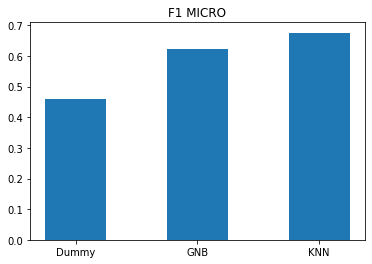

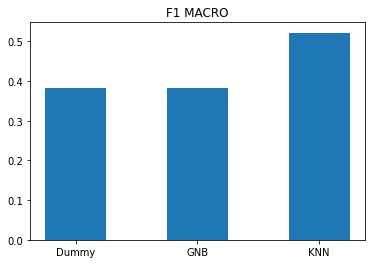

In [ ]:
import matplotlib.pyplot as plt 

clfs = ['Dummy', 'GNB', 'KNN']
f1_micro = [dummy_f1_micro, gnb_f1_micro, knn_f1_micro]
f1_macro = [dummy_f1_macro, gnb_f1_macro, knn_f1_macro]

plt.figure()
plt.title("F1 MICRO")
plt.bar(clfs, f1_micro, width=0.5)
plt.show()
plt.close()

plt.figure()
plt.title("F1 MACRO")
plt.bar(clfs, f1_macro, width=0.5)
plt.show()
plt.close()

Στη συγκεκριμένη εφαρμογή μας με το δεδομένο dataset, είναι λογικό να κάνουμε χρήση του micro-average της f1 μετρικής για την εξαγωγή πιο σωστών συμπερασμάτων, καθώς έχουμε ένα imbalance dataset. Από το πρώτο bar plot, φαίνεται ότι καλύτερη επίδοση πετυχαίνουμε τον 5-Nearest Neighbor ταξινομητή, μετά με τον Gaussian Naive Bayes και τέλος με τον Dummy Classifier, κάτι που είναι αναμενόμενο με βάση την θεωρία. 

Πατατηρώντας το δεύτερο bar plot, βλέπουμε ότι ο dummy classifier πετυχαίνει μία καλύτερη επίδοση στην macro-average f1 και είναι πιο κοντά στους υπόλοιπους classifiers απ' ότι στην περίπτωση της f1 micro-average. Αυτό μπορεί να συμβαίνει, επειδή στην περίπτωση του dummy classifier, η κλάση που περιέχει αρκετά λιγότερα δείγματα, μπορεί να έχει καλύτερη (ή να είναι αρκετά κοντά) f1 μετρική ξεχωριστά από την "μεγάλη" κλάση (σε σχέση με τους υπόλοιπους ταξινομητές). Έτσι, καθώς στην macro average, δεν υπάρχουν βάρη για την κάθε κλάση και λαμβάνουμε έναν συνολικό μέσο όρο, τότε η "μικρή" κλάση μπορεί να επηρεάζει το ίδιο την μετρική και άρα βλέπουμε ανακριβή αποτελέσματα. 

Μπορούμε να εκτυπώσουμε στη συνέχεια και το classification report για τον κάθε ταξινομητή :


In [ ]:
from sklearn.metrics import classification_report
print ("Dummy Classifier")
print(classification_report(test_labels, dummy_preds, target_names=label_names))
print ("Gaussian Naive Bayes")
print(classification_report(test_labels, gnb_preds, target_names=label_names))
print ("K-Nearest Neihgbors")
print(classification_report(test_labels, knn_preds, target_names=label_names))

Dummy Classifier
              precision    recall  f1-score   support

    planning       0.65      0.56      0.60        27
  relaxation       0.14      0.20      0.17        10

    accuracy                           0.46        37
   macro avg       0.40      0.38      0.38        37
weighted avg       0.51      0.46      0.48        37

Gaussian Naive Bayes
              precision    recall  f1-score   support

    planning       0.70      0.85      0.77        27
  relaxation       0.00      0.00      0.00        10

    accuracy                           0.62        37
   macro avg       0.35      0.43      0.38        37
weighted avg       0.51      0.62      0.56        37

K-Nearest Neihgbors
              precision    recall  f1-score   support

    planning       0.74      0.85      0.79        27
  relaxation       0.33      0.20      0.25        10

    accuracy                           0.68        37
   macro avg       0.54      0.53      0.52        37
weighted avg    

Παρατηρούμε ότι το precision μένει σχετικά σταθερό για την περίπτωση της πρώτης κλάσης σε όλες τις τρεις περιπτώσεις των ταξινομητών. Αντιθέτως, όπως παρατηρήσαμε και από τα confusion matrixes που εκτυπώναμε σε κάθε έναν ταξινομητή ξεχωριστά, τα False Positive της 2ης κλάσης μειώνονται καθώς μεταβαίνουμε από τον Dummy στον GNB και στον KNN, καθώς συγκεντρώνονται όλο και περισσότερα δείγματα στην 1η κλάση. Έτσι, η τιμή του precision αυξάνεται. Η κύρια διαφορά για τον micro-average f1 score φαίνεται να συμβαίνει στις τιμές του recall της 1ης κλάσης, το οποίο συνεχώς αυξάνεται (εκείνο της 2ης κλάσης παραμένει σταθερό, καθώς και στις 3 περιπτώσεις ισούται με $\frac{1}{8+1}$) . Έτσι, καταλήγουμε στο συμπέρασμα ότι όλο και περισσότερα δείγματα ταξινομούνται στην πρώτη κλάση και επομένως μπορεί να έχουμε υψηλή ακρίβεια στην πραγματική εύρεση ενός δείγματος στην πρώτη κλάση, αλλά έχουμε και μεγάλο ποσοστό εσφαλμένων εκτιμήσεων όσον αφορά την δεύτερη κλάση. Το παραπάνω συμπέρασμα ανάγεται και από τις τιμές των confusion matrixes. Είναι εντυπωσιακό ότι και στους 3 ταξινομητές, ο αριθμός των $T_p$ της κλάσης "relaxation" είναι μόνο 1. 
Θυμίζουμε ότι για τον υπολογισμό του Precision, Recall και f1 ισχύουν οι τύποι : 
$$P = \frac{T_p}{T_p+F_p}$$
$$R = \frac{T_p}{T_p + F_n}$$
$$F1 = 2\frac{P \times R}{P+R}$$

Από τα παραπάνω, προκύπτει και το προηγούμενο συμπέρασμα σχετικά με την ερμηνεία του macro-average f1_score. Η "μικρή" κλάση (η δεύτερη) στον dummy ταξινομητή πετυχαίνει καλύτερη ισορροπία μεταξύ precision και recall και συνεπώς έχει μία τιμή f1 κοντά σε εκείνες των άλλων 2 ταξινομητών. Έτσι, όταν λαμβάνουμε τον μέσο όρο χωρίς βάρη, προκύπτει πλησιέστερη τιμή.


##Βελτιστοποίηση Ταξινομητών

In [ ]:
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
#one of them will remain
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
#finally we will chose one of them
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Παρατηρούμε αρχικά τις διάφορες τιμές του variance στις οποίες κινείται κάθε feature μας. Αυτό θα μας βοηθήσει ώστε να χρησιμοποιήσουμε τα κατάλληλα όρια στον *Variance Threshold* για την βελτιστοποίηση.

In [ ]:
train_variance = features.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.23176614 0.14656199 0.11710626 0.16985383 0.22604193 0.16251264
 0.20889567 0.14895715 0.23908972 0.1824743  0.11764092 0.11101374]
0.2390897191422523


In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
minmax = MinMaxScaler()
rus = RandomUnderSampler()

vthreshold = [0, 0.12, 0.15, 0.17, 0.21, 0.24] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [3, 5, 8, 10, 12]
#Aν θέλουμε να δοκιμάσουμε κατώφλια μεγαλύτερα του 0 στο VarianceThreshold, πρέπει πρώτα να εφαρμόσουμε τον minmaxscaler
#(γιατί οι μεταβλητές με μεγάλες μέσες τιμές θα δώσουν γενικά μεγαλύτερη τιμή variance)
#άρα θα πάει minmaxscaler->VarianceThreshold
#H εφαρμογή του VarianceThreshold δεν έχει προφανώς νόημα μετά το StandarScaler (γιατί όλες οι μεταβλητές έχουν variance 1 μετά το transform)
#VarTh->StandarScaler

###**Dummy Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

dummy1 = DummyClassifier()
dummy2 = DummyClassifier()
dummy3 = DummyClassifier()
dummy4 = DummyClassifier()
dummy5 = DummyClassifier()
dummy6 = DummyClassifier()
dummy7 = DummyClassifier()

In [ ]:
from sklearn.metrics import classification_report

dummy_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dummy1)], memory = 'tmp')
dummy_pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', rus), ('pca', pca), ('dummy', dummy2)], memory = 'tmp')
dummy_pipe3 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', ros), ('pca', pca), ('dummy', dummy3)], memory = 'tmp')
dummy_pipe4 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', rus), ('pca', pca), ('dummy', dummy4)], memory = 'tmp')
dummy_pipe5 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('dummy', dummy5)], memory = 'tmp')
dummy_pipe6 = Pipeline(steps=[('selector', selector), ('sampler', rus), ('pca', pca), ('dummy', dummy6)], memory = 'tmp')
dummy_pipe7 = Pipeline(steps=[ ('selector', selector), ('pca', pca), ('dummy', dummy7)], memory = 'tmp')

dummy_pipes = [dummy_pipe1, dummy_pipe2, dummy_pipe3, dummy_pipe4, dummy_pipe5, dummy_pipe6, dummy_pipe7]

for dummy_pipe in dummy_pipes:
  #this returns me the best estimator
  dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  #to evaluate it we will use cross validation
  #we can add other metrics as well
  #dummy_f1_micro = np.mean(cross_val_score(dummy_estimator, train, train_labels, cv=10, scoring='f1_micro'))
  #dummy_f1_macro = np.mean(cross_val_score(dummy_estimator, train, train_labels, cv=10, scoring='f1_macro'))
  dummy_estimator.fit(train, train_labels)
  print("Score", dummy_estimator.best_score_)
  print(dummy_estimator.best_estimator_)
  print(dummy_estimator.best_params_)
  print("-----------------------------------------------------------------------")
  #this returns me the best estimator
  dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)
  #to evaluate it we will use cross validation
  #we can add other metrics as well
  #dummy_f1_micro = np.mean(cross_val_score(dummy_estimator, train, train_labels, cv=10, scoring='f1_micro'))
  #dummy_f1_macro = np.mean(cross_val_score(dummy_estimator, train, train_labels, cv=10, scoring='f1_macro'))
  dummy_estimator.fit(train, train_labels)
  print("Score", dummy_estimator.best_score_)
  print(dummy_estimator.best_estimator_)
  print(dummy_estimator.best_params_)
  print("-----------------------------------------------------------------------")


Score 0.5537383230804283
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.12)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dummy',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='warn'))],
         verbose=False)
{'pca__n_components': 5, 'selector__threshold': 0.12}
-----------------------------------------------------------------------
Score 0.5461904761904762
Pipeline(memory='tmp',
         steps=[('selector

Τα παραπάνω αποτελέσματα οδηγούν σε κάποια πολύ ενδιαφέροντα συμπεράσματα σχετικά με τους ταξινομητές **Dummy**. Παρατηρούμε ότι η απόδοση όλων των ταξινομητών είναι ίδια, εκτός από αυτούς που τους λείπει ο **sampler** από την προεπεξεργασία. Καταλαβαίνουμε, λοιπόν, ότι η υψηλή ή χαμηλή απόδοσή τους εξαρτάται από το πλήθος των δειγμάτων που τους εισάγουμε. Αξίζει να σημειώσουμε ότι αν τρέξουμε με τους ίδιους ταξινομητές τα ίδια δεδομένα, θα παίρναμε διαφορετικές επιδόσεις. Οι παρατηρήσεις αυτές δε μας κάνουν εντύπωση δεδομένου ότι η λειτουργία των **Dummy** ταξινομητών βασίζεται σε τυχαίες προβλέψεις, σεβόμενες την κατανομή των χαρακτηριστικών, όπως την εξάγει ο ταξινομητής. 

Η επιλογή, επομένως, του κατάλληλου **Pipeline** για τον **Dummy** ταξινομητή δεν είναι καίρια -ο ταξινομητής έτσι κι αλλιώς θα βασίσει στην "τύχη" τα αποτελέσματά του.

Με βάση και τα παραπάνω αποτελέσματα θα επιλέξουμε τον απλό, χωρίς προεπεξεργασία δεδομένων, **Dummy** ταξινομητή.

In [ ]:
#after having found the best estimator we repeat fitting-predicting to measure performance
best_dummy =  DummyClassifier()
dummy_pipe = Pipeline(steps=[('dummy', best_dummy)], memory = 'tmp') #best
#gnb_estimator = GridSearchCV(gnb_pipe, dict( pca__n_components=n_components ), cv=10, scoring='f1_micro', n_jobs=-1) 

import time

#fitting
start_time_fit = time.time()
#gnb_estimator.fit(train, train_labels)
dummy_pipe.fit(train, train_labels)
dummy_fit_time = time.time() - start_time_fit

#predicting
start_time_predict = time.time()
#gnb_opt_preds = gnb_estimator.predict(test)
dummy_opt_preds = dummy_pipe.predict(test)
dummy_predict_time = time.time() - start_time_predict

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", dummy_fit_time)
print("Predicting time", dummy_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, dummy_opt_preds))

#print confusion matrix, f1-micro and f1-macro
dummy_opt_cnf_matrix = confusion_matrix(test_labels, dummy_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(dummy_opt_cnf_matrix)

dummy_opt_f1_micro = f1_score(test_labels, dummy_opt_preds, average='micro')
dummy_opt_f1_macro = f1_score(test_labels, dummy_opt_preds, average='macro')

print()
print("The f1 micro score is ", dummy_opt_f1_micro, "\n")
print("The f1 macro score is ", dummy_opt_f1_macro, "\n")

Συνολικός χρόνος fit και predict: 0.0011653900146484375 seconds
Fitting time 0.0008578300476074219
Predicting time 0.0002181529998779297

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.89      0.86        27
           2       0.62      0.50      0.56        10

    accuracy                           0.78        37
   macro avg       0.73      0.69      0.71        37
weighted avg       0.77      0.78      0.78        37


Confusion Matrix
['planning', 'relaxation']
[[24  3]
 [ 5  5]]

The f1 micro score is  0.7837837837837838 

The f1 macro score is  0.7063492063492064 



###**Gaussian Naive Bayes**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 

gnb1 = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()

Χρησιμοποιούμε τεχνική **top-down** προκειμένου να βρούμε την βέλτιστη αρχιτεκτονική. Αυτό σημαίνει ότι ξεκινάμε με όλα τα δυνατά στάδια και στη συνέχεια εφαρμόζουμε κάποιους διαφορετικούς συνδυασμούς αφαιρώντας στάδια. 

In [ ]:
#searching for best estimator
from sklearn.metrics import classification_report

gnb_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb1)], memory = 'tmp')
gnb_pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', rus), ('pca', pca), ('gnb', gnb2)], memory = 'tmp')
gnb_pipe3 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', gnb3)], memory = 'tmp')
gnb_pipe4 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', rus), ('pca', pca), ('gnb', gnb4)], memory = 'tmp')
gnb_pipe5 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('gnb', gnb5)], memory = 'tmp')
gnb_pipe6 = Pipeline(steps=[('selector', selector), ('sampler', rus), ('pca', pca), ('gnb', gnb6)], memory = 'tmp')
gnb_pipe7 = Pipeline(steps=[ ('selector', selector), ('pca', pca), ('gnb', gnb7)], memory = 'tmp')
gnb_pipe8 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('gnb', gnb8)], memory = 'tmp')
gnb_pipe9 = Pipeline(steps=[ ('pca', pca), ('gnb', gnb9)], memory = 'tmp')

gnb_pipes = [gnb_pipe1, gnb_pipe2, gnb_pipe3, gnb_pipe4, gnb_pipe5, gnb_pipe6, gnb_pipe7, gnb_pipe8, gnb_pipe9]

count = 0
for gnb_pipe in gnb_pipes:
  if (count == 7):
    gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)
  elif (count == 8):
    gnb_estimator = GridSearchCV(gnb_pipe, dict( pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  else :
    gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  gnb_estimator.fit(train, train_labels)
  print("Score", gnb_estimator.best_score_)
  print(gnb_estimator.best_estimator_)
  print(gnb_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")
  if (count == 7):
    gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)
  elif (count== 8):
    gnb_estimator = GridSearchCV(gnb_pipe, dict( pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)
  else :
    gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)
  gnb_estimator.fit(train, train_labels)
  print("Score", gnb_estimator.best_score_)
  print(gnb_estimator.best_estimator_)
  print(gnb_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")
  count = count+1


Score 0.45976064913758413
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.12)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 5, 'selector__threshold': 0.12}
-----------------------------------------------------------------------------------
Score 0.5009523809523809
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.12)),
                ('scal

Από τα παραπάνω αποτελέσματα, εξάγουμε το συμπέρασμα ότι ο καλύτερος (ή ένας που δουλεύει αρκετά καλά) ταξινομητής προκύπτει από το έβδομο **Pipeline**. Αυτό θα χρησιμοποιήσουμε στη συνέχεια με τις παραμέτρους που προκύπτουν από το **GridSearch** για το τελικό μοντέλο μας.

Τα παραπάνω, όμως, αποτελέσματα οδηγούν σε κάποιες πολύ ενδιαφέρουσες παρατηρήσεις. Παρατηρούμε ότι το καλύτερο αποτέλεσμα κατά τις 2 μετρικές f1_micro και f1_macro το πετυχαίνουμε στην περίπτωση που χρησιμοποιούμε πέρα από τον estimator μας μόνο έναν selector και pca. Στην περίπτωση του f1_macro, έχουμε βέλτιστα αποτελέσματα για την υπερπαράμετρο του pca ίση με 12 και variance_threshod ίσο με 0, ενώ στην περίπτωση της f1_micro έχουμε τιμές 3 και 0.12 αντίστοιχα. Οι δύο επιπλέον περίπτωσεις που προστέθηκαν στο τέλος (μία χωρίς pca και μία χωρίς selector) δεν επιφέρουν καλύτερα αποτελέσματα από τα προηγούμενα.

In [ ]:
#after having found the best estimator we repeat fitting-predicting to measure performance
best_selector = VarianceThreshold(threshold=0.12)
#best_scaler = StandardScaler()
#best_sampler = RandomOverSampler()
best_pca = PCA(n_components=3)
best_gnb = GaussianNB()
gnb_pipe = Pipeline(steps=[ ('selector', best_selector), ('pca', best_pca), ('gnb', best_gnb)], memory = 'tmp')
#gnb_estimator = GridSearchCV(gnb_pipe, dict( pca__n_components=n_components ), cv=10, scoring='f1_micro', n_jobs=-1) 

import time

#fitting
start_time_fit = time.time()
#gnb_estimator.fit(train, train_labels)
gnb_pipe.fit(train, train_labels)
gnb_fit_time = time.time() - start_time_fit

#predicting
start_time_predict = time.time()
#gnb_opt_preds = gnb_estimator.predict(test)
gnb_opt_preds = gnb_pipe.predict(test)
gnb_predict_time = time.time() - start_time_predict

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", gnb_fit_time)
print("Predicting time", gnb_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, gnb_opt_preds))

#print confusion matrix, f1-micro and f1-macro
gnb_opt_cnf_matrix = confusion_matrix(test_labels, gnb_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(gnb_opt_cnf_matrix)

gnb_opt_f1_micro = f1_score(test_labels, gnb_opt_preds, average='micro')
gnb_opt_f1_macro = f1_score(test_labels, gnb_opt_preds, average='macro')

print()
print("The f1 micro score is ", gnb_opt_f1_micro, "\n")
print("The f1 macro score is ", gnb_opt_f1_macro, "\n")


Συνολικός χρόνος fit και predict: 0.004939556121826172 seconds
Fitting time 0.004404783248901367
Predicting time 0.0004885196685791016

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.93      0.81        27
           2       0.00      0.00      0.00        10

    accuracy                           0.68        37
   macro avg       0.36      0.46      0.40        37
weighted avg       0.52      0.68      0.59        37


Confusion Matrix
['planning', 'relaxation']
[[25  2]
 [10  0]]

The f1 micro score is  0.6756756756756757 

The f1 macro score is  0.40322580645161293 



Δοκιμάσαμε και τις δύο βέλτιστες περίπτωσεις. Η κρίση του βέλτιστου pipeline με βάση την f1_micro μας δίνει καλύτερα αποτελέσματα.

###**K-Nearest Neighbors**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()
knn3 = KNeighborsClassifier()
knn4 = KNeighborsClassifier()
knn5 = KNeighborsClassifier()
knn6 = KNeighborsClassifier()
knn7 = KNeighborsClassifier()
knn8 = KNeighborsClassifier()
knn9 = KNeighborsClassifier()

k = [1, 3, 5, 7, 9]

In [ ]:
#search for best estimator
from sklearn.metrics import classification_report

knn_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn1)], memory = 'tmp')
knn_pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', rus), ('pca', pca), ('knn', knn2)], memory = 'tmp')
knn_pipe3 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn3)], memory = 'tmp')
knn_pipe4 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('sampler', rus), ('pca', pca), ('knn', knn4)], memory = 'tmp')
knn_pipe5 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('knn', knn5)], memory = 'tmp')
knn_pipe6 = Pipeline(steps=[('selector', selector), ('sampler', rus), ('pca', pca), ('knn', knn6)], memory = 'tmp')
knn_pipe7 = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', knn7)], memory = 'tmp')
knn_pipe8 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('knn', knn8)], memory = 'tmp')
knn_pipe9 = Pipeline(steps=[ ('pca', pca), ('knn', knn9)], memory = 'tmp')

knn_pipes = [knn_pipe1, knn_pipe2, knn_pipe3, knn_pipe4, knn_pipe5, knn_pipe6, knn_pipe7, knn_pipe8, knn_pipe9]

count = 0
for knn_pipe in knn_pipes:
  if (count == 7):
    knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)
  elif (count == 8):
    knn_estimator = GridSearchCV(knn_pipe, dict( pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  else :
    knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
  
  knn_estimator.fit(train, train_labels)
  #knn_opt_preds = knn_estimator.predict(valid)
  #print(classification_report(valid_labels, knn_opt_preds))
  print("Score", knn_estimator.best_score_)
  print(knn_estimator.best_estimator_)
  print(knn_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")
  if (count == 7):
    knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)
  elif (count == 8):
    knn_estimator = GridSearchCV(knn_pipe, dict( pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)
  else :
    knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
  
  knn_estimator.fit(train, train_labels)
  #knn_opt_preds = knn_estimator.predict(valid)
  #print(classification_report(valid_labels, knn_opt_preds))
  print("Score", knn_estimator.best_score_)
  print(knn_estimator.best_estimator_)
  print(knn_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")
  count = count + 1


Score 0.5899632034632034
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'knn__n_neighbors': 1, 'pca__n_components': 3

Με βάση τα παραπάνω αποτελέσματα επιλέγουμε τον έβδομο συνδυασμό, ο οποίος χρησιμοποιεί έναν selector και pca. Κρίνοντας από την μετρική f1_micro, καλύτερα αποτελέσματα φαίνεται να μας δίνει ο 9-NN με 0.15 threshold και 5 components του pca. Έχοντας ως scoring το f1_macro, βέλτιστος εκτιμητής είναι ο 1-NN με 0.12 threshold και 5 components. Οι βέλτιστες αυτές περιπτώσεις δοκιμάζονται και παρακάτω. Ο εκτιμητής αυτός πετυχαίνει καλύτερες τιμές score κατά μέσο όρο στις δύο περιπτώσεις. 

In [ ]:
#knn_pipe = Pipeline(steps=[ ('scaler', minmax), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp') #best till now
best_selector = VarianceThreshold(threshold=0.15)
best_pca = PCA(n_components=5)
best_knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline(steps=[ ('selector', best_selector), ('pca', best_pca), ('knn', best_knn)], memory = 'tmp')
#knn_estimator = GridSearchCV(knn_pipe, dict( knn__n_neighbors=k ), cv=10, scoring='f1_micro', n_jobs=-1) 

start_time_fit = time.time()
#knn_estimator.fit(train, train_labels)
knn_pipe.fit(train, train_labels)
knn_fit_time = time.time() - start_time_fit

start_time_predict = time.time()
#knn_opt_preds = knn_estimator.predict(test)
knn_opt_preds = knn_pipe.predict(test)
knn_predict_time = time.time() - start_time_predict
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", knn_fit_time)
print("Predicting time", knn_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, knn_opt_preds))

#print confusion matrix, f1-micro and f1-macro
knn_opt_cnf_matrix = confusion_matrix(test_labels, knn_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(knn_opt_cnf_matrix)

knn_opt_f1_micro = f1_score(test_labels, knn_opt_preds, average='micro')
knn_opt_f1_macro = f1_score(test_labels, knn_opt_preds, average='macro')

print()
print("The f1 micro score is ", knn_opt_f1_micro, "\n")
print("The f1 macro score is ", knn_opt_f1_macro, "\n")


Συνολικός χρόνος fit και predict: 0.011176109313964844 seconds
Fitting time 0.007890939712524414
Predicting time 0.0032198429107666016

Classification Report
              precision    recall  f1-score   support

           1       0.73      1.00      0.84        27
           2       0.00      0.00      0.00        10

    accuracy                           0.73        37
   macro avg       0.36      0.50      0.42        37
weighted avg       0.53      0.73      0.62        37


Confusion Matrix
['planning', 'relaxation']
[[27  0]
 [10  0]]

The f1 micro score is  0.7297297297297297 

The f1 macro score is  0.42187499999999994 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Metrics

#### Times

In [ ]:
print("Kind of time     | Dummy Classifier       | Gaussian Naive Bayes   | K-Nearest Neighbors ")
print("----------------------------------------------------------------------------------------------")
print("fitting time     | {}  | {}   | {}".format(dummy_fit_time, gnb_fit_time, knn_fit_time))
print("prediction time  | {}  | {}  | {}".format(dummy_predict_time, gnb_predict_time, knn_predict_time))

Kind of time     | Dummy Classifier       | Gaussian Naive Bayes   | K-Nearest Neighbors 
----------------------------------------------------------------------------------------------
fitting time     | 0.0008578300476074219  | 0.004404783248901367   | 0.007890939712524414
prediction time  | 0.0002181529998779297  | 0.0004885196685791016  | 0.0032198429107666016


Όπως είναι λογικό ο χρόνος αυξάνεται καθώς μεταβαίνουμε από τον Dummy στον GNB και στον KNN ταξινομητή τόσο κατά την διαδικασία του fitting όσο και του prediction. Ο dummy αποφασίζει συνεχώς με τυχαίο τρόπο και επομένως ο χρόνος είναι πολύ μικρός. Ο GNB διαθέτει ένα κριτήριο για την εκπαίδευση του μοντέλου, ενώ ο KNN είναι ακόμα πιο περίπλοκος, καθώς αναζητά και αποστάσεις από κοντινότερους γείτονες. 

#### Bar Plots

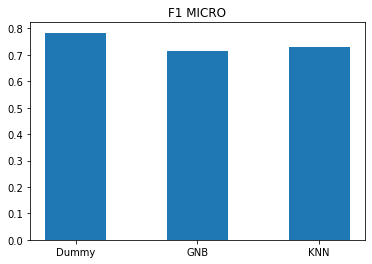

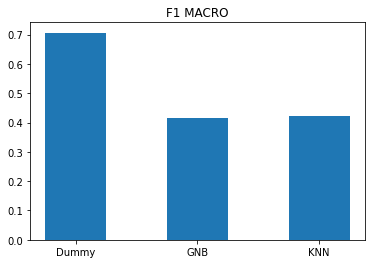

In [ ]:
clfs = ['Dummy', 'GNB', 'KNN']
f1_micro = [dummy_opt_f1_micro, gnb_opt_f1_micro, knn_opt_f1_micro]
f1_macro = [dummy_opt_f1_macro, gnb_opt_f1_macro, knn_opt_f1_macro]

plt.figure()
plt.title("F1 MICRO")
plt.bar(clfs, f1_micro, width=0.5)
plt.show()
plt.close()

plt.figure()
plt.title("F1 MACRO")
plt.bar(clfs, f1_macro, width=0.5)
plt.show()
plt.close()

Στην προκειμένη περίπτωση, έτυχε η τυχαία εκτέλεση του dummy classifier να είναι πολύ κοντά στα πραγματικά δεδομένα και να πετυχαίνει αρκετά βέλτιστα αποτελέσματα. Αυτό αποτελεί, όμως, την εξαίρεση και όχι κάποιον κανόνα. Οι ταξινομητές GNB και KNN φαίνεται να αύξησαν την μετρική f1_micro, η οποία αποτελεί και την πιο έμπιστη πηγή συμπερασμάτων για το συγκεκριμένο dataset, καθώς τα δείγματα μας δεν είναι ισορροπημένα. Αντίθετα, καμία βέλτιστη αρχιτεκτονική που επιλέξαμε δεν κάνει χρήση κάποιου oversampler ή undersampler. Έτσι, η μετρική f1_macro συνεχίζει να μην μας παρέχει σημαντικά συμπεράσματα. Ωστόσο, όπως φαίνεται, οι τιμές των 2 ταξινομητών παραμένουν αρκετά χαμηλές και δεν σημειώνεται ιδιαίτερη βελτίωση ως προς αυτές. 

#### Επίδοση βελτιστοποίησης

In [ ]:
print ("Μεταβολές επίδοσης των βελτιστοποιήμενων εκδόσεων από τις προηγούμενες :")
print()
print("Metric     | Dummy Classifier     | Gaussian Naive Bayes   | K-Nearest Neighbors ")
print("----------------------------------------------------------------------------------------------")
print("f1_micro   | {}   | {}    | {}".format(dummy_opt_f1_micro - dummy_f1_micro, gnb_opt_f1_micro - gnb_f1_micro, knn_opt_f1_micro - knn_f1_micro))
print("f1_macro   | {}   | {}   | {}".format(dummy_opt_f1_macro - dummy_f1_macro, gnb_opt_f1_macro - gnb_f1_macro, knn_opt_f1_macro - knn_f1_macro))

Μεταβολές επίδοσης των βελτιστοποιήμενων εκδόσεων από τις προηγούμενες :

Metric     | Dummy Classifier     | Gaussian Naive Bayes   | K-Nearest Neighbors 
----------------------------------------------------------------------------------------------
f1_micro   | 0.3243243243243243   | 0.09299826141931411    | 0.05405405405405406
f1_macro   | 0.3230158730158731   | 0.033400537634408534   | -0.0996767241379311


Και εδώ φαίνονται πιο εύκολα οι βελτιώσεις που σχολιάσαμε προηγουμένως. Ο Dummy Classifier πετυχαίνει τρομερές βελτιώσεις, οι οποίες όμως δεν έχουν καμία απολύτως λογική, καθώς οφείλεται καθαρά σε μεγαλύτερη τύχη που φαίνεται να είχε κατά το δεύτερο τρέξιμο του. Ο GNB παρουσίαζει την πιο σημαντική βελτίωση ως προς τις 2 μετρικές, αλλά παραμένει με μικρότερες τιμές από εκείνες του KNN. Στον KNN, σημείωνεται μία μείωση του f1_macro κατά την βελτιστοποίηση. Αυτό οφείλεται στο γεγονός ότι εστιάσαμε στην βελτίωση του f1_micro και επιπλέον δεν χρησιμοποιήσαμε κάποιο στάδιο εξισορρόπησης των δειγμάτων. 

#### Other Metrics

In [ ]:
print ("Dummy Classifier")
print(classification_report(test_labels, dummy_opt_preds, target_names=label_names))
print ("Gaussian Naive Bayes")
print(classification_report(test_labels, gnb_opt_preds, target_names=label_names))
print ("K-Nearest Neihgbors")
print(classification_report(test_labels, knn_opt_preds, target_names=label_names))

Dummy Classifier
              precision    recall  f1-score   support

    planning       0.83      0.89      0.86        27
  relaxation       0.62      0.50      0.56        10

    accuracy                           0.78        37
   macro avg       0.73      0.69      0.71        37
weighted avg       0.77      0.78      0.78        37

Gaussian Naive Bayes
              precision    recall  f1-score   support

    planning       0.71      0.93      0.81        27
  relaxation       0.00      0.00      0.00        10

    accuracy                           0.68        37
   macro avg       0.36      0.46      0.40        37
weighted avg       0.52      0.68      0.59        37

K-Nearest Neihgbors
              precision    recall  f1-score   support

    planning       0.73      1.00      0.84        27
  relaxation       0.00      0.00      0.00        10

    accuracy                           0.73        37
   macro avg       0.36      0.50      0.42        37
weighted avg    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Στα παραπάνω classification reports, είναι ιδιαίτερα εντυπωσιακές οι μηδενικές τιμές που σημειώνονται τόσο στο precision όσο και στο recall στους δύο ταξινομητές GNB και KNN. Αυτό πρακτικά σημαίνει ότι όλα τα δείγματα που έχουμε στο test dataset μας, ανατίθενται στην πρώτη κλάση και όυτε ένα δεν κατοχυρώνεται στην δεύτερη (στην πραγματικότητα στον gnb, 2 δείγματα κατοχυρώνονται λανθασμένα στην δεύτερη κλάση). Έτσι, συμπεραίνουμε ότι κατά την βελτιστοποίηση των ταξινομητών μας, αυξήθηκε η ισχύς της "μεγάλης" κλάσης και η πρόβλεψη δειγμάτων για την δεύτερη είναι πολύ δύσκολη. Στην αντίθετη πλευρά, ωστόσο, πετυχαίνουμε μεγάλο recall για την πρώτη κλάση και σιγούρευουμε την πρόβλεψη της πρώτης κλάσης στην περίπτωση που θα μας έρθει κάποιο δείγμα που όντως θα ανήκει σε αυτήν. Αυτό μπορεί να είναι ένα αρκετά θετικό αποτέλεσμα, αν η ανίχνευση της κατάστασης planning κρίνεται σημαντική για το δεδομένο πρόβλημα. 

Τα παραπάνω αποτέλεσματα επιβεβαιώνουν και επιβεβαιώνονται από τις ιδιότητες των ίδιων των ταξινομητών που χρησιμοποιούμε. Ας θυμηθούμε τον τρόπο λειτουργίας των δύο αυτών ταξινομητών.

Πρώτα σημειώνουμε κάποιες παρατηρήσεις σχετικά με την ίδια τη φύση των δεδομένων. Είναι λογικό να πιστεύουμε ότι τα δεδομένα μας δεν είναι πολύ "μακρυά" ως τιμές. Πρόκειται για σήματα καταγραφής της εγκεφαλικής δραστηριότητας σε δύο καταστάσεις χαλάρωσης-σχεδιασμού που όμως δε μπορεί να διαφέρουν πολύ μεταξύ τους (πιθανώς στο σχεδιασμό να έχουμε μία πιο έντονη συχνότητα των κυματομορφών και ίσως μεγαλύτερο πλάτος). Αυτό επιβεβαιώνεται και από τη χρησιμότητα της pca.

Ο **Naive Bayes** ταξινομητής προσπαθεί να μάθει την κατανομή των δεδομένων των δύο κλάσεων για να μπορέσει να τις διαχωρίσει. Ωστόσο, η ανισορροπία του dataset οδηγεί σε καλή εκμάθηση της πρώτης κατανομής αλλά πολύ κακή εκτίμηση της δεύτερης. Δεδομένης της εγγενούς εγγύτητας των δειγμάτων και της κακής προσέγγισης της δεύτερης κατανομής είναι λογικό τα περισσότερα δείγματα να ταξινομούνται στην πρώτη κατηγορία.

Ο **k-NN** είναι επίσης ένας ταξινομητής ευάλωτος στην ανισορροπία των δεδομένων. Καθώς χρησιμοποιεί το πλήθος των γειτόνων ενός δείγματος για να το κατατάξει σε κατάλληλη κλάση, είναι λογικό να βρίσκει, σε οριακά δείγματα, περισσότερους γείτονες της αντίθετης κατηγορίας εφόσον αυτή είναι πολυπληθέστερη. Μάλιστα, στο συγκεκριμένο dataset όπου εκτιμούμε ότι τα δείγματα είναι από τη φύση τους κοντινά, αδυναμία του ταξινομητή γίνεται ιδιαίτερα εμφανής.

Στην παραπάνω συζήτηση φαίνεται να στοχοποιούμε την ανισορροπία του dataset για την κακή -σχετικά- απόδοση των ταξινομητών. Εφόσον διαθέτουμε τα μέσα -**OverSampling**, **UnderSampling**- για την διόρθωση αυτής της ανισορροπίας εγείρεται το ερώτημα: γιατί τα **Pipelines** που εφαρμόζουν αυτή τη τεχνική δεν αποδίδουν καλύτερα;
Εδώ θα πρέπει να λάβουμε υπόψη το γεγονός ότι το dataset που εξετάζουμε είναι πράγματι μικρό. Ως αποτέλεσμα η εκμάθηση των σωστών συνιστωσών-παραμέτρων για τη μοντελοποίησή του είναι έτσι κι αλλιώς μια δύσκολη διαδικασία. Με την επεξεργασία των δεδομένων μπορεί να αφαιρέσουμε δείγματα κάνοντας ακόμα χειρότερες εκτιμήσεις, ή να προσθέσουμε "λάθος" δείγματα που ενισχύουν μοντελοποιήσεις που δεν είναι επιθυμητές. Γι'αυτό και η σωστή εκμάθηση έστω της μία εκ των κλάσεων που μελετάμε δίνει αποτελέσματα καλύτερα σε μέσο όρο από τη μερική εκμάθηση και των δύο. 

#Μεγάλο Dataset

##Παρουσίαση συνόλου δεδομένων

Το μεγάλο Dataset που θα επεξεργαστούμε σε αυτή την ενότητα είναι το [ISOLET](http://archive.ics.uci.edu/ml/datasets/ISOLET). Το Dataset αυτό αφορά στην αναγνώριση των 26 γραμμάτων A-Z από ανάλυση ηχητικών δεδομένων προφοράς της.
Συγκεκριμένα, πρόκειται για ένα multiclass dataset, καθώς κάθε δυνατό δείγμα μπορεί να ταξινομηθεί σε μία κλάση που αντιστοιχεί σε ένα γράμμα της αλφαβήτου. Έτσι, έχουμε 26 δυνατές κλάσεις (από Α ως Z). 

Το δείγμα μας προέρχεται από 150 άτομα τα οποία πρόφεραν το κάθε γράμμα από 2 φορές. Έτσι, έχουμε 52 δείγματα από το κάθε άτομο. Το dataset μας χωρίζεται σε 5 γκρουπ από 30 άτομα το καθένα, τα οποία θα ενώσουμε σε ένα ενιαίο σύνολο. 

Συνολικά, προκύπτουν 7797 δείγματα. Στην πραγματικότητα θα έπρεπε να έχουμε ${52*150} = 7800$ δείγματα. Ωστόσο, λείπουν 3 δείγματα από το dataset μας : 2 από το γράμμα F και ένα από το Μ. 

Επιπλέον, αποτελείται από 617 χαρακτηριστικά. Αυτά αφορούν κάποια χαρακτηριστικά ανάλυσης των ηχητικών σηματών τα οποία δεν εξηγούνται περαιτέρω και είναι δοσμένα σε πραγματικές τιμές. 

Το dataset δεν περιέχει κάποια γραμμή επικεφαλίδας και λεπτομερειών, καθώς αυτά παρέχονται σε ξεχωριστό αρχείο. 

Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολόνα και δίνονται με μία πραγματική τιμή από 1. έως 26. που αντιστοιχούν στο κατ' αρίθμηση γράμμα της αλφαβήτου από Α (το 1.) σε Ζ (το 26.).

Για να παρούμε τα αρχεία δεδομένων, θα πρέπει να κατεβάζουμε τα 2 αρχεία .zip που μας δίνονται [εδώ](http://archive.ics.uci.edu/ml/machine-learning-databases/isolet/) και να τα ενώσουμε σε ένα ενιαίο αρχείο. 

Η διαδικασία φαίνεται στον παρακάτω κώδικα : 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

all_filenames = ["/content/drive/MyDrive/isolet1+2+3+4.data", "/content/drive/My Drive/isolet5.data"]
data = pd.concat([pd.read_csv(f, header = None) for f in all_filenames ])
#show original data form
print(data[:5])
print()
#auto-conversion to numpy array with .values() method
res = data.values
#res = np.array(res)
print ("Final data shape:", res.shape)

      0       1       2       3       4    ...     613     614     615     616  617
0 -0.4394 -0.0930  0.1718  0.4620  0.6226  ...  0.3334  0.6410  0.5898 -0.4872  1.0
1 -0.4348 -0.1198  0.2474  0.4036  0.5026  ...  0.2046  0.4318  0.4546 -0.0910  1.0
2 -0.2330  0.2124  0.5014  0.5222 -0.3422  ...  0.1112  0.2540  0.1588 -0.4762  2.0
3 -0.3808 -0.0096  0.2602  0.2554 -0.4290  ...  0.0792 -0.0072  0.0936 -0.1510  2.0
4 -0.3412  0.0946  0.6082  0.6216 -0.1622  ...  0.3124  0.3124  0.2188 -0.2500  3.0

[5 rows x 618 columns]

Final data shape: (7797, 618)


In [ ]:
#the actual features are the first 617 elements
features = res[:,:617]
#the 618th element is the label (position 617 in the array starting from 0)
labels = res[:, 617]
labels = labels.astype(int)
label_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

print(labels)
print (labels.shape)
print(features)
print(features.shape)

[ 1  1  2 ... 25 26 26]
(7797,)
[[-0.4394 -0.093   0.1718 ...  0.641   0.5898 -0.4872]
 [-0.4348 -0.1198  0.2474 ...  0.4318  0.4546 -0.091 ]
 [-0.233   0.2124  0.5014 ...  0.254   0.1588 -0.4762]
 ...
 [-0.6696 -0.373   0.1584 ...  0.0728  0.0728 -0.5818]
 [-0.5764 -0.1764  0.5106 ...  0.3044 -0.0434 -0.5   ]
 [-0.6624 -0.3334  0.3666 ... -0.0894 -0.1708 -0.317 ]]
(7797, 617)


Για να πάρουμε το ενιαίο αρχείο, όπως φαίνεται και παραπάνω, περάσαμε στο Drive τα unzipped αρχεία και στη συνέχεια ενώσαμε τα περιεχόμενα σε ένα ενιαίο αρχείο.

Όπως μας δίνεται στις πληροφορίες του dataset, δεν υπάρχουν απουσιάζουσες τιμές. Υπάρχουν μόνο, όπως αναφέραμε ήδη, samples που απουσιάζουν ολόκληρα και συνεπώς δεν μας επηρεάζουν κάπως. 
Αυτό φαίνεται και παρακάτω : 

In [ ]:
null_values = data.isnull().any().any()
if  null_values:
  print(data.isnull())
else:
  print("There is no null value in data.")

There is no null value in data.


Ο αριθμός των κλάσεων είναι 26 και η κάθε μία (το κάθε ένα γράμμα ουσιαστικά) εμφανίζεται συνολικά 300 φορές. Εξαίρεση αποτελεί το γράμμα F που εμφανίζεται 298 και το Μ που εμφανίζεται 299. Αποδεικνύεται και παρακάτω : 


In [ ]:
appear = np.bincount(labels)[1:]

print("Letter | Times ")
for i in range (26) :
  print (" {}     | {}".format(label_names[i], appear[i]))

Letter | Times 
 A     | 300
 B     | 300
 C     | 300
 D     | 300
 E     | 300
 F     | 298
 G     | 300
 H     | 300
 I     | 300
 J     | 300
 K     | 300
 L     | 300
 M     | 299
 N     | 300
 O     | 300
 P     | 300
 Q     | 300
 R     | 300
 S     | 300
 T     | 300
 U     | 300
 V     | 300
 W     | 300
 X     | 300
 Y     | 300
 Z     | 300


Επομένως, το dataset μας είναι αρκετά ισορροπημένο και δεν χρειάζεται περαιτέρω επξεργασία.

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

print(test.shape)
print(train.shape)
print(test_labels.shape)
print(train_labels.shape)

(2340, 617)
(5457, 617)
(2340,)
(5457,)


##Ταξινόμηση

Στη συνέχεια της εργασίας θα εξετάσουμε τους εξής 5 ταξινομητές πάνω στο dataset μας : **Dummy classifier**, **Gaussian Naive Bayes**, **Κ-Nearest Neighbors**, **Multi-Layer Perceptron (MLP)** και **Support Vector Machines (SVM)**.

###**Dummy Classifier**




In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier()
dummy = dc_uniform.fit(train, train_labels)

dummy_preds = dc_uniform.predict(test)
print(dummy_preds)
print(test_labels)

[23  8 19 ... 25 21 22]
[25 26  1 ... 25 26 26]


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, dummy_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(cnf_matrix)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[5 2 2 4 3 4 2 2 3 1 4 3 4 5 6 6 7 2 4 4 3 1 6 1 2 4]
 [6 7 4 4 6 5 1 3 1 2 2 2 5 4 3 1 4 5 3 0 6 4 2 2 5 3]
 [5 3 4 4 3 4 4 1 6 1 2 1 5 2 7 2 2 5 5 3 5 4 3 4 4 1]
 [8 4 8 1 1 4 3 5 1 5 1 2 6 1 5 2 2 4 2 2 1 4 3 3 8 4]
 [3 3 3 7 3 3 4 7 2 4 1 2 2 3 4 6 7 2 3 4 4 5 0 4 3 1]
 [1 5 5 6 4 3 2 5 3 2 2 4 4 1 3 3 2 3 1 7 2 7 3 5 3 3]
 [2 4 3 6 2 6 3 4 1 4 4 3 3 3 7 6 1 2 3 1 1 5 3 3 8 2]
 [4 3 2 4 1 2 3 3 2 7 1 6 7 3 2 3 2 4 2 5 3 3 6 3 7 2]
 [5 2 1 5 5 1 4 1 7 5 6 3 3 2 2 1 2 3 3 5 1 4 2 6 6 5]
 [7 4 4 4 3 5 5 3 3 1 3 4 3 5 4 2 4 4 1 2 2 2 5 4 3 3]
 [3 5 4 5 2 1 7 4 4 5 3 6 3 4 7 4 3 1 2 1 3 1 4 2 2 4]
 [3 4 3 1 3 3 6 4 3 3 2 3 3 3 4 3 1 5 4 5 5 7 0 5 5 2]
 [6 4 2 1 2 2 1 3 2 7 1 4 4 2 2 1 7 7 4 4 4 6 2 2 4 5]
 [5 3 3 0 2 2 1 3 3 7 4 5 5 5 4 3 2 5 2 3 3 5 8 0 5 2]
 [2 4 4 2 2 3 5 5 3 6 3 4 2 3 1 3 3 5 3 3 8 3 3 3 6 1]
 [2 4 5 2 1 4 1 4 6 3 4 4 5 4 7 3 2 3 2 5 1 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
 
dummy_f1_micro = f1_score(test_labels, dummy_preds, average='micro')
dummy_f1_macro = f1_score(test_labels, dummy_preds, average='macro')

print("The f1 micro score is ", dummy_f1_micro, "\n")
print("The f1 macro score is ", dummy_f1_macro, "\n")

The f1 micro score is  0.0405982905982906 

The f1 macro score is  0.04088752656046512 



Αξίζει να σχολιάσουμε σε αυτό το σημείο τη χαμηλή επίδοση του ταξινομητή. Ειδικά σε αντιδιαστολή με το **Μικρό Dataset** όπου ο εν λόγω ταξινομητής πετυχαίνει τα καλύτερα αποτελέσματα. Αποδίδουμε αυτή τη συμπεριφορά ακριβώς στη διαφορά μεγέθους. Όσο μεγαλύτερο είναι το σύνολο δεδομένων τόσο η τυχαία ταξινόμηση θα έχει χαμηλότερη απόδοση. 

### **Gaussian Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb_model = gnb.fit(train, train_labels)

gnb_preds = gnb.predict(test)
print(gnb_preds)
print(test_labels)

[25 26  1 ... 25 26 26]
[25 26  1 ... 25 26 26]


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
gnb_cnf_matrix = confusion_matrix(test_labels, gnb_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(gnb_cnf_matrix)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[84  1  0  0  1  0  0  2  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 5 25  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  2  0
   0  0]
 [ 0  0 81  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  8]
 [ 1  3  0 34 41  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  5  3  2  0
   0  0]
 [ 1  5  0  2 79  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  0
   0  0]
 [ 0  0  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  1 26
   0  0]
 [ 0  0  0  0  1  0 73  0  0  1  0  0  0  0  0  1  3  0  0  7  0  1  0  0
   0  3]
 [ 0  0  0  0  1  0  0 88  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  2  0  0 79  0  0  0  0  1  0  0  0  6  0  0  0  0  1  1
   0  0]
 [ 0  0  0  0  0  0  2  1  0 72 10  0  0  0  0  1  2  0  0  0  0  0  2  0
   0  0]
 [ 0  0  0  0  1  1  0  0  0  2 78  0  

Παρατηρούμε τα αποτελέσματα του confusion matrix. Βλέπουμε ότι τα λάθη ταξινόμησης που γίνονται είναι μεταξύ γραμμάτων που πράγματι είναι "κοντά" ηχητικά. Για παράδειγμα, στην περίπτωση του 'Α' παρατηρούμε ότι ταξινομούνται ως 'Α' γράμματα όπως 'Ε', 'Η', 'Κ'.

In [ ]:
from sklearn.metrics import f1_score

gnb_f1_micro = f1_score(test_labels, gnb_preds, average='micro')
gnb_f1_macro = f1_score(test_labels, gnb_preds, average='macro')


print("The f1 micro score is ", gnb_f1_micro, "\n")
print("The f1 macro score is ", gnb_f1_macro, "\n")

The f1 micro score is  0.8055555555555556 

The f1 macro score is  0.8011978423287158 



Το παραπάνω αποτέλεσμα είναι αρκετά ενθαρρυντικό σχετικά με τη διαχωρισιμότητα του Dataset. Βλέπουμε ότι η χαμηλή επίδοση του **Dummy** οφειλόταν πράγματι στην τυχαιότητα και όχι σε κάποια εγγενή δυσκολία του συνόλου δεδομένων, αφού εδώ πετυχαίνουμε πολύ καλή ακρίβεια πρόβλεψης. 

### **K-Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier() 
knn_model = knn.fit(train, train_labels)

knn_preds = knn.predict(test)
print(knn_preds)
print(test_labels)

[25 26  1 ... 25 26 26]
[25 26  1 ... 25 26 26]


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(test_labels, knn_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(knn_cnf_matrix)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[87  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 83  0  1  4  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0 88  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  2]
 [ 1  5  0 79  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0  0  0  2  0  0
   0  0]
 [ 0 15  0  6 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1
   0  0]
 [ 0  0  0  2  0  0 82  0  0  1  0  0  0  0  0  0  0  0  0  5  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0 88  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 85  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 89  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 13 77  0  

Τα λάθη που παρατηρούμε σε αυτή την περίπτωση είναι ακόμα πιο "λογικά" από την παραπάνω. Ας δούμε τα γράμματα που έχουμε εσφαλμένα ταξινομηθεί στο 'A'. Παρατηρούμε ότι μόνο το 'Κ' έχει ταξινομηθεί ως 'Α'. Τα δύο αυτά γράμματα περιέχουν τον ήχο 'ε-ϊ', συνεπώς η σύγχυση μεταξύ τους είναι δικαιολογημένη. 

In [ ]:
from sklearn.metrics import f1_score

knn_f1_micro = f1_score(test_labels, knn_preds, average='micro')
knn_f1_macro = f1_score(test_labels, knn_preds, average='macro')

print("The f1 micro score is ", knn_f1_micro, "\n")
print("The f1 macro score is ", knn_f1_macro, "\n")

The f1 micro score is  0.897008547008547 

The f1 macro score is  0.8961145731402053 



Παρατηρούμε περαιτέρω αύξηση της επίδοσης όσο προχωράμε σε πιο "έξυπνους" ταξινομητές. Επιπλέον, όπως και στα παραπάνω, μπορούμε να δούμε ότι οι δύο μετρικές που χρησιμοποιούμε έχουν κοντινές αποδόσεις. Το γεγονός αυτό οφείλεται στην ισορροπία του συνόλου δεδομένων που παρατηρήσαμε και θα αξιοποιηθεί στη συνέχεια της μελέτης. 

### **Multi-Layer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp_model = mlp.fit(train, train_labels)

mlp_preds = mlp.predict(test)
print(mlp_preds)
print(test_labels)

[25 26  1 ... 25 26 26]
[25 26  1 ... 25 26 26]


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
mlp_cnf_matrix = confusion_matrix(test_labels, mlp_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(mlp_cnf_matrix)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1 81  0  1  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0  0]
 [ 0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  1  0 83  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  1  2  0  0  0
   0  0]
 [ 0  2  0  0 87  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  1 89  0  

Ήδη από την παρατήρηση του **confusion matrix** καταλαβαίνουμε ότι ο ταξινομητής πετυχαίνει πολύ καλή αναγνώριση των ήχων. Σημειώνουμε ότι η αναγνώριση των φωνήεντων φαίνεται να είναι πιο εύκολη όπωςήταν αναμενόμενο. Αυτό, καθώς οι ήχοι των φωνηέντων είναι ευδιάκριτα φωνήματα σε αντίθεση με τα σύμφωνα που το συριστικό τους μέρος (που μοιάζει με θόρυβο) είναι δύσκολο να διακριθεί.

In [ ]:
from sklearn.metrics import f1_score

mlp_f1_micro = f1_score(test_labels, mlp_preds, average='micro')
mlp_f1_macro = f1_score(test_labels, mlp_preds, average='macro')

print("The f1 micro score is ", mlp_f1_micro, "\n")
print("The f1 macro score is ", mlp_f1_macro, "\n")

The f1 micro score is  0.9594017094017094 

The f1 macro score is  0.9590597667866553 



Ο **MLP** πετυχαίνει ακόμη καλύτερη επίδοση όπως μπορέσαμε να αντιληφθούμε ήδη από την παρατηρήση του confusion matrix. 

### **Support Vector Machines (SVM)**






In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm_model = svm.fit(train, train_labels)

svm_preds = svm.predict(test)
print(svm_preds)
print(test_labels)

[25 26  1 ... 25 26 26]
[25 26  1 ... 25 26 26]


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
svm_cnf_matrix = confusion_matrix(test_labels, svm_preds)

# τυπώνουμε το confusion matrix
print(label_names)
print(svm_cnf_matrix)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[88  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1 83  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  0 84  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  2  0  0
   0  0]
 [ 0  4  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 85  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  2
   0  0]
 [ 0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  1  0  0 88  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  0  0  0  3 86  0  

In [ ]:
from sklearn.metrics import f1_score

svc_f1_micro = f1_score(test_labels, svm_preds, average='micro')
svc_f1_macro = f1_score(test_labels, svm_preds, average='macro')

print("The f1 micro score is ", svc_f1_micro, "\n")
print("The f1 macro score is ", svc_f1_macro, "\n")

The f1 micro score is  0.9572649572649573 

The f1 macro score is  0.9571057315578085 



Παρατηρούμε ότι η επίδοσή μας δεν βελτιώνεται σημαντικά σε σχέση με τονπροηγούμενο ταξινομητή. Αυτό μπορεί να μας οδηγήσει σε δύο συμπεράσματα. Πρώτον, οι ταξινομητές **MLP** και **SVM** είναι ισοδύναμοι στον εν λόγω dataset. Δεύτερον, η επίδοση που πετυχαίνουμε είναι κοντά στη βέλτιστη δυνατή. Το τελευταίο συμπέρασμα ενισχύεται από την υψηλή τιμή της επίδοσης αυτής που δε δίνει μεγάλο περιθώριο βελτίωσης.

###Bar Plots

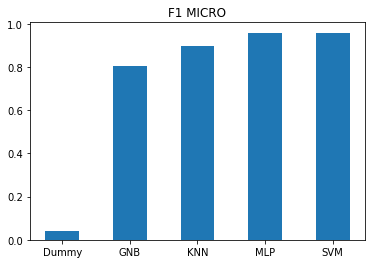

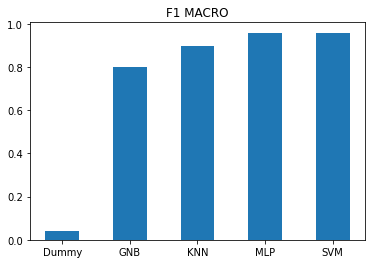

In [ ]:
import matplotlib.pyplot as plt 

clfs = ['Dummy', 'GNB', 'KNN', 'MLP', 'SVM']
f1_micro = [dummy_f1_micro, gnb_f1_micro, knn_f1_micro, mlp_f1_micro, svc_f1_micro]
f1_macro = [dummy_f1_macro, gnb_f1_macro, knn_f1_macro, mlp_f1_macro, svc_f1_macro]

plt.figure()
plt.title("F1 MICRO")
plt.bar(clfs, f1_micro, width=0.5)
plt.show()
plt.close()

plt.figure()
plt.title("F1 MACRO")
plt.bar(clfs, f1_macro, width=0.5)
plt.show()
plt.close()

Παρατηρώντας τα **Bar Plots** συγκεντρώνουμε όλες τις προηγούμενες παρατηρήσεις μας. Βλέπουμε την αναμενόμενη χαμηλή επίδοση του **Dummy** ταξινομητή την οποία αποδίδουμε στην τυχαιότητά του. Επιπλέον, παρατηρούμε ότι όσο πιο πολύπλοκο ταξινομητή χρησιμοποιούμε τόσο καλύτερη πρόβλεψη πετυχαίνουμε. Η παρατήρηση αυτή αποδίδεται στο ότι πρόκειται για ένα περίπλοκο dataset, με πολλές διαστάσεις και πολλά clusters στα οποία πρέπει να διαχωρίσουμε τα δεδομένα. Το γεγονός της ισοδυναμίας των ταξινομητών **MLP**, **SVM** μας οδηγεί στο συμπέρασμα ότι τα δεδομένα είναι γραμμικά διαχωρίσιμα (αφού λειτουργεί τόσο καλά ο **SVM**) και μάλιστα χωρίς να έχουμε μειώσει τις διαστάσεις τους. Τέλος, σε σύγκριση με το μικρό dataset, τονίζουμε ότι είναι σημαντικό να έχουμε πολλά δειγμάτων για την καλύτερη επίδοση των ταξινομητών. Βέβαια, σίγουρα το είδος του συνόλου δεδομένων σίγουρα παίζει καθοριστικό ρόλο επίσης.

Επιπλέον παρατηρούμε ίδια κατανομή τόσο για την μετρική f1_macro όσο και για την f1_micro, καθώς αλλάζουμε ταξινομητή με αρκετά όμοιες αριθμητικές αποδόσεις. Αυτό είναι απολύτως λογικό να συμβαίνει καθώς το dataset μας είναι αρκετά ισορροπημένο και δεν υπάρχουν διαφορές στον αριθμό δειγμάτων για την κάθε κλάση.

In [ ]:
from sklearn.metrics import classification_report
print ("Dummy Classifier")
print(classification_report(test_labels, dummy_preds, target_names=label_names))
print ("Gaussian Naive Bayes")
print(classification_report(test_labels, gnb_preds, target_names=label_names))
print ("K-Nearest Neihgbors")
print(classification_report(test_labels, knn_preds, target_names=label_names))
print ("Multi-Layer Perceptron (MLP)")
print(classification_report(test_labels, mlp_preds, target_names=label_names))
print ("Support Vector Machines (SVM)")
print(classification_report(test_labels, svm_preds, target_names=label_names))

Dummy Classifier
              precision    recall  f1-score   support

           A       0.05      0.06      0.05        90
           B       0.06      0.08      0.07        90
           C       0.04      0.04      0.04        90
           D       0.01      0.01      0.01        90
           E       0.04      0.03      0.04        90
           F       0.03      0.03      0.03        89
           G       0.04      0.03      0.03        90
           H       0.03      0.03      0.03        90
           I       0.08      0.08      0.08        90
           J       0.01      0.01      0.01        90
           K       0.04      0.03      0.03        90
           L       0.03      0.03      0.03        90
           M       0.04      0.04      0.04        89
           N       0.06      0.06      0.06        90
           O       0.01      0.01      0.01        90
           P       0.04      0.03      0.03        90
           Q       0.05      0.04      0.04        90
          

Οι παραπάνω πίνακες παρατίθενται για να τονίσουμε ξανα ότι οι μετρικές που χρησιμοποιούμε είναι -σχετικά- ισοδύναμες σε αυτό το dataset. Αυτό οφείλεται στο γεγονός ότι το σύνολο δεδομένων είναι ισορροπημένο. 

##**Βελτιστοποίηση Ταξινομητών**

Η διαδικασία βελτιστοποιήσης που θα ακολουθήσουμε για το μεγάλο dataset θα διαφέρει από την προηγούμενη διαδικασία. Αυτό συμβαίνει καθώς αυτό το dataset είναι ισορροπημένο. Έτσι ο έλεγχος για τη χρησιμότητα των **samplers** στη διαδικασία προεπεξεργασίας των δεδομένων κρίνεται περιττός. Για τον ίδιο λόγο, ο έλεγχος της επίδοσης των **pipelines** αρκεί να γίνει στην **fi-macro** μετρική, αφού όπως τονίσαμε και παραπάνω, οι δύο μετρικές είναι ισοδύναμες σε ισορροπημένο dataset. 

In [ ]:
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
#one of them will remain
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
#finally we will chose one of them... do we need this now that it is balanced...???
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train_variance = features.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.05602963 0.10244442 0.10669169 0.09503724 0.21294618 0.32482415
 0.31322883 0.28633986 0.27950279 0.26554392 0.23014677 0.19793479
 0.20215643 0.22438852 0.22976247 0.22833121 0.20385896 0.17659017
 0.15284086 0.13723526 0.13095597 0.13498177 0.14613688 0.15320433
 0.15161886 0.15006474 0.14914919 0.14901919 0.15186753 0.16478568
 0.18513045 0.21505827 0.04597688 0.0842121  0.0955552  0.084932
 0.20831022 0.33235107 0.33857148 0.32393367 0.31015541 0.28469106
 0.24520798 0.21552913 0.21618694 0.23408933 0.23768789 0.23387794
 0.20977796 0.17447835 0.14115746 0.12191355 0.11668857 0.12259402
 0.13314197 0.14056747 0.14544559 0.14664773 0.14712816 0.14579621
 0.15064743 0.16209348 0.18508537 0.2179551  0.04418908 0.08523376
 0.10403551 0.08600894 0.2051429  0.33850921 0.36019077 0.35068606
 0.3454847  0.32876234 0.29098768 0.25958303 0.25397924 0.25923271
 0.24851492 0.23756139 0.21239831 0.18451652 0.15291437 0.13180159
 0.12873481 0.13794336 0.14706362 0.15072153 0.15272268 0.153419

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
minmax = MinMaxScaler()
rus = RandomUnderSampler()

vthreshold = [0, 0.1, 0.2, 0.3, 0.5] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [10, 50, 100, 300]

###**Dummy Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

dummy1 = DummyClassifier()
dummy2 = DummyClassifier()
dummy3 = DummyClassifier()

In [ ]:
from sklearn.metrics import classification_report

dummy_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('dummy', dummy1)], memory = 'tmp')
dummy_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('dummy', dummy2)], memory = 'tmp')
dummy_pipe3 = Pipeline(steps=[ ('selector', selector), ('pca', pca), ('dummy', dummy3)], memory = 'tmp')

dummy_pipes = [dummy_pipe1, dummy_pipe2, dummy_pipe3]

for dummy_pipe in dummy_pipes:
  #this returns me the best estimator
  dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold,\
                                                  pca__n_components=n_components),\
                                  cv=5, scoring='f1_macro', n_jobs=-1)
  #to evaluate it we will use cross validation
  dummy_estimator.fit(train, train_labels)
  print("Score", dummy_estimator.best_score_)
  print(dummy_estimator.best_estimator_)
  print(dummy_estimator.best_params_)
  print("-----------------------------------------------------------------------")

Score 0.040303829685732734
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dummy',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='warn'))],
         verbose=False)
{'pca__n_components': 50, 'selector__threshold': 0}
-----------------------------------------------------------------------
Score 0.038298394885283395
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
      

Οι παρατηρήσεις μας στο μικρό dataset σχετικά με τη λειτουργία του **Dummy** ταξινομητή δεν έχουν λόγο να αλλάξουν εδώ. Ωστόσο, για επιβεβαίωση, τρέξαμε και εδώ τα αντίστοιχα **GridSearch**. Και πάλι παρατηρήσαμε ότι η λειτουργία του εν λόγω ταξινομητή βασίζεται στην τύχη επομένως θα επιλέξουμε έναν απλό **Dummy Classifier** για τη σύγκριση με τον αρχικό, αφού η προεπεξεργασία των δεδομένων δε θα παίξει ρόλο.

Επιπλέον, παρατηρούμε ότι σε αυτό το dataset η "τύχη" του ταξινομητή φαίνεται να μη συνεχίζεται. Αυτή η παρατήρηση είναι λογική καθώς ο ταξινομητής εξετάζεται σε μεγαλύτερο σύνολο δδομένων όπου λίγες σωστές απαντήσεις δε μπορούν να "σώσουν" τη συνολική εικόνα.

In [ ]:
import time

#after having found the best estimator we repeat fitting-predicting to measure performance
best_dummy =  DummyClassifier()
dummy_pipe = Pipeline(steps=[('dummy', best_dummy)], memory = 'tmp') #best

#fitting
start_time_fit = time.time()
#gnb_estimator.fit(train, train_labels)
dummy_pipe.fit(train, train_labels)
dummy_fit_time = time.time() - start_time_fit

#predicting
start_time_predict = time.time()
dummy_opt_preds = dummy_pipe.predict(test)
dummy_predict_time = time.time() - start_time_predict

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", dummy_fit_time)
print("Predicting time", dummy_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, dummy_opt_preds))

#print confusion matrix, f1-micro and f1-macro
dummy_opt_cnf_matrix = confusion_matrix(test_labels, dummy_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(dummy_opt_cnf_matrix)

dummy_opt_f1_micro = f1_score(test_labels, dummy_opt_preds, average='micro')
dummy_opt_f1_macro = f1_score(test_labels, dummy_opt_preds, average='macro')

print()
print("The f1 micro score is ", dummy_opt_f1_micro, "\n")
print("The f1 macro score is ", dummy_opt_f1_macro, "\n")

Συνολικός χρόνος fit και predict: 0.004538297653198242 seconds
Fitting time 0.001506805419921875
Predicting time 0.002982616424560547

Classification Report
              precision    recall  f1-score   support

           1       0.02      0.02      0.02        90
           2       0.04      0.04      0.04        90
           3       0.03      0.03      0.03        90
           4       0.05      0.06      0.05        90
           5       0.05      0.06      0.05        90
           6       0.06      0.07      0.06        89
           7       0.05      0.06      0.05        90
           8       0.07      0.07      0.07        90
           9       0.07      0.07      0.07        90
          10       0.06      0.06      0.06        90
          11       0.03      0.03      0.03        90
          12       0.04      0.03      0.03        90
          13       0.02      0.02      0.02        89
          14       0.05      0.06      0.05        90
          15       0.04      0.0

###**Gaussian Naive Bayes**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 

gnb1 = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()

In [ ]:
#searching for best estimator
from sklearn.metrics import classification_report

gnb_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', gnb1)], memory = 'tmp')
gnb_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('gnb', gnb2)], memory = 'tmp')
gnb_pipe3 = Pipeline(steps=[ ('selector', selector), ('pca', pca), ('gnb', gnb3)], memory = 'tmp')

gnb_pipes = [gnb_pipe1, gnb_pipe2, gnb_pipe3]

for gnb_pipe in gnb_pipes:
  gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
  gnb_estimator.fit(train, train_labels)
  print("Score", gnb_estimator.best_score_)
  print(gnb_estimator.best_estimator_)
  print(gnb_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")


Score 0.9114928478916247
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 100, 'selector__threshold': 0.1}
-----------------------------------------------------------------------------------
Score 0.9198682018502785
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0

Από τα παραπάνω αποτέλεσματα θα παρατηρήσουμε ότι οι επιδόσεις των ταξινομητών με την προεργασία είναι πολύ κοντινές.
Ωστόσο, η τελευταία περίπτωση είναι η οριακά καλύτερη και θα επιλέξουμε αυτή ως τελική, βέλτιστη εκδοχή του **GNB**. Οι παράμετροι των σταδίων της προεπεξεργασίας είναι:
 * **PCA**: 100 
 * **VarianceThreshold**: 0

In [ ]:
import time

#after having found the best estimator we repeat fitting-predicting to measure performance
best_selector = VarianceThreshold(threshold=0)
best_pca = PCA(n_components=100)
best_gnb = GaussianNB()
gnb_pipe = Pipeline(steps=[('scaler', minmax), ('selector', best_selector), ('sampler', ros), ('pca', best_pca), ('gnb', best_gnb)], memory = 'tmp') #best


#fitting
start_time_fit = time.time()
gnb_pipe.fit(train, train_labels)
gnb_fit_time = time.time() - start_time_fit

#predicting
start_time_predict = time.time()
gnb_opt_preds = gnb_pipe.predict(test)
gnb_predict_time = time.time() - start_time_predict

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", gnb_fit_time)
print("Predicting time", gnb_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, gnb_opt_preds))

#print confusion matrix, f1-micro and f1-macro
gnb_opt_cnf_matrix = confusion_matrix(test_labels, gnb_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(gnb_opt_cnf_matrix)

gnb_opt_f1_micro = f1_score(test_labels, gnb_opt_preds, average='micro')
gnb_opt_f1_macro = f1_score(test_labels, gnb_opt_preds, average='macro')

print()
print("The f1 micro score is ", gnb_opt_f1_micro, "\n")
print("The f1 macro score is ", gnb_opt_f1_macro, "\n")


Συνολικός χρόνος fit και predict: 1.2716944217681885 seconds
Fitting time 1.1879785060882568
Predicting time 0.08363699913024902

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.96      0.92        90
           2       0.86      0.83      0.85        90
           3       0.94      0.97      0.95        90
           4       0.88      0.82      0.85        90
           5       0.89      0.88      0.88        90
           6       0.90      0.94      0.92        89
           7       0.92      0.92      0.92        90
           8       0.99      0.99      0.99        90
           9       1.00      0.93      0.97        90
          10       0.93      0.92      0.93        90
          11       0.91      0.89      0.90        90
          12       0.97      0.98      0.97        90
          13       0.83      0.90      0.86        89
          14       0.85      0.80      0.82        90
          15       0.98      0.97    

Βλέπουμε ότι η επίδοση στα test δεδομένα είναι ελάχιστα χειρότερη από αυτή που προέκυψε κατά τη διαδικασία βελτιστοποίησης. Ωστόσο, έχουμε σημαντική αύξηση σε σχέση με την επίδοση του ίδιου ταξινομητή χωρίς προεπεξεργασία των δεδομένων (όπως τον τρέξαμε παραπάνω στο κεφάλαιο της *Ταξινόμησης*). 

###**K-Nearest Neighbors Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()
knn3 = KNeighborsClassifier()

k = [10, 20]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
#search for best estimator
from sklearn.metrics import classification_report

knn_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', knn1)], memory = 'tmp')
knn_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('knn', knn2)], memory = 'tmp')
knn_pipe3 = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', knn3)], memory = 'tmp')

knn_pipes = [knn_pipe1, knn_pipe2, knn_pipe3]

for knn_pipe in knn_pipes:
  knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k, knn__weights = weights, knn__metric = metric), cv=5, scoring='f1_macro', n_jobs=-1)
  knn_estimator.fit(train, train_labels)
  print("Score", knn_estimator.best_score_)
  print(knn_estimator.best_estimator_)
  print(knn_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")


Score 0.9118225073565842
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=300,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=20, p=2,
                                      weights='distance'))],
         verbose=False)
{'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'distance', 'pca__n_components': 300, 'selector__threshold': 0}
-----------------------------------------------------------------------------------
Score 0.9189620138040432
Pipeline(memor

In [ ]:
#without pre-processing
knn = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[('knn', knn)], memory = 'tmp')
knn_estimator = GridSearchCV(knn_pipe, dict(knn__n_neighbors=k, knn__weights = weights, knn__metric = metric),\
                             cv=5, scoring='f1_macro', n_jobs=-1)
knn_estimator.fit(train, train_labels)
print("Score", knn_estimator.best_score_)
print(knn_estimator.best_estimator_)
print(knn_estimator.best_params_)

Score 0.913517958556547
Pipeline(memory='tmp',
         steps=[('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='distance'))],
         verbose=False)
{'knn__metric': 'euclidean', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}


Από τα παραπάνω αποτέλεσματα προκύπτει ότι ο βέλτιστος **KNN** ταξινομητής απαιτεί προεπεξεργασία των δεδομένων και έχει τις εξής παραμέτρους:
* **MinMaxScaler**
* **VarianceThreshold**: 0
* **PCA**: 300
* **k_neighbors**: 10
* **weigths**: distance
* **metric**: euclidean

Σημειώνουμε ότι δοκιμάσαμε και διαφορετικούς από τους παραπάνω συνδυασμούς για τη βελτιστοποιήση και παραθέτουμε αυτόν που μας έδωσε την τελική λύση (δηαλδή έχουμε δοκιμάσει και πολύ περισσότερους γείτονες ως παράμετρο του **KNN** αλλά φαίνεται οι 10 να είναι αρκετοί).

In [ ]:
#best classifier
best_scaler = MinMaxScaler()
best_selector = VarianceThreshold(threshold=0)
best_pca = PCA(n_components=300)
best_knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean')
knn_pipe = Pipeline(steps=[('scaler', best_scaler), ('selector', best_selector), ('pca', best_pca), ('knn', best_knn)], memory = 'tmp') #best till now

start_time_fit = time.time()
knn_pipe.fit(train, train_labels)
knn_fit_time = time.time() - start_time_fit

start_time_predict = time.time()
knn_opt_preds = knn_pipe.predict(test)
knn_predict_time = time.time() - start_time_predict
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", knn_fit_time)
print("Predicting time", knn_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, knn_opt_preds))

#print confusion matrix, f1-micro and f1-macro
knn_opt_cnf_matrix = confusion_matrix(test_labels, knn_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(knn_opt_cnf_matrix)

knn_opt_f1_micro = f1_score(test_labels, knn_opt_preds, average='micro')
knn_opt_f1_macro = f1_score(test_labels, knn_opt_preds, average='macro')

print()
print("The f1 micro score is ", knn_opt_f1_micro, "\n")
print("The f1 macro score is ", knn_opt_f1_macro, "\n")


Συνολικός χρόνος fit και predict: 7.526737928390503 seconds
Fitting time 0.3793609142303467
Predicting time 7.147304534912109

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.97      0.95        90
           2       0.76      0.92      0.83        90
           3       0.91      0.98      0.94        90
           4       0.83      0.91      0.87        90
           5       0.92      0.90      0.91        90
           6       0.85      0.96      0.90        89
           7       0.89      0.93      0.91        90
           8       1.00      0.98      0.99        90
           9       1.00      0.94      0.97        90
          10       0.86      1.00      0.92        90
          11       0.94      0.88      0.91        90
          12       0.97      0.99      0.98        90
          13       0.84      0.83      0.84        89
          14       0.93      0.83      0.88        90
          15       0.97      1.00      0

Αρχικά, επιβεβαιώνουμε την εκτίμησή μας για την ισοδυναμία των μετρικών **f1-macro**, **f1-micro** αφού η ταξινόμηση των test δίνει σχεδόν ίδιες τιμές και για τις δύο. Επομένως, ορθά αποφύγαμε να βελτιστοποίησουμε και ως προς την **f1-micro** μετρική.

Επιπλέον, παρατηρούμε ότι έχουμε και πάλι βελτίωση της απόδοσης του ταξινομητή όταν εισάγουμε της προ-επεξεργασία των δεδομένων και τη βελτιστοποίηση ως προς την παράμετρο. Πράγματι, η default τιμή του αριθμού των γειτόνων, που χρησιμοποίθηκε και στην πρώτη εφαρμογή του **kNN** είναι 5, ενώ εδώ προέκυψε ότι η τιμή 10 είναι η βέλτιστη. 

### **Multi-Layer Perceptron (MLP)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier()
mlp2 = MLPClassifier()
mlp3 = MLPClassifier()

hidden_layer_sizes = [(100), (200)] #only one hidden layer
activation = ['logistic', 'tanh', 'relu'] #['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'adam'] #['lbfgs', 'sgd', 'adam']
max_iter = [100, 200]
learning_rate = ['constant', 'invscaling', 'adaptive']
alpha = [0, 0.00005]

In [ ]:
#search for best estimator
from sklearn.metrics import classification_report

mlp_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp1)], memory = 'tmp')
mlp_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('mlp', mlp2)], memory = 'tmp')
mlp_pipe3 = Pipeline(steps=[('selector', selector), ('pca', pca), ('mlp', mlp3)], memory = 'tmp')

mlp_pipes = [mlp_pipe1, mlp_pipe2, mlp_pipe3]

for mlp_pipe in mlp_pipes:
  mlp_estimator = GridSearchCV(mlp_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,\
                                              mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver,\
                                              mlp__max_iter=max_iter, mlp__learning_rate=learning_rate, mlp__alpha=alpha),\
                                cv=5, scoring='f1_macro', n_jobs=-1)
  mlp_estimator.fit(train, train_labels)
  print("Score", mlp_estimator.best_score_)
  print(mlp_estimator.best_estimator_)
  print(mlp_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")

Score 0.9558974774881959
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=300,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=5e-05,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='adaptive',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score 0.9564163271958812
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=300,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=100,
                               learning_rate='invscaling',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=100, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=Non

In [ ]:
#GridSearch with just the classifier, without pre-processing
mlp = MLPClassifier()
mlp_pipe = Pipeline(steps=[('mlp', mlp)], memory = 'tmp')
mlp_estimator = GridSearchCV(mlp_pipe, dict(mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver,\
                                            mlp__max_iter=max_iter, mlp__learning_rate=learning_rate, mlp__alpha=alpha),\
                                cv=5, scoring='f1_macro', n_jobs=-1)
mlp_estimator.fit(train, train_labels)
print("Score", mlp_estimator.best_score_)
print(mlp_estimator.best_estimator_)
print(mlp_estimator.best_params_)

Score 0.9555457563405734
Pipeline(memory='tmp',
         steps=[('mlp',
                 MLPClassifier(activation='logistic', alpha=5e-05,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)
{'mlp__activation': 'logistic', 'mlp__alpha': 5e-05, 'mlp__hidden_layer_sizes': 200, 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}


Βλέπουμε ότι και πάλι οι επιδόσεις των ταξινομητών τόσο με την προεργασία όσο και χωρίς είναι πολύ κοντινές.
Η περίπτωση που επιλέγουμε ως βέλτιστη εκδοχή του **MLP** είναι:
 * **PCA**: 300 
 * **VarianceThreshold**: 0
 * **activation**: relu
 * **alpha**: 0
 * **hidden_layer_sizes**: 200
 * **learning rate**: adaptive
 * **max_iter**: 200
 * **solver**: adam

In [ ]:
import time
#best-estimator
best_selector = VarianceThreshold(threshold=0)
best_pca = PCA(n_components=300)
best_mlp = MLPClassifier(activation='relu', alpha=0, hidden_layer_sizes=(200), learning_rate='adaptive',\
                         max_iter=200, solver='adam')
mlp_pipe = Pipeline(steps=[('selector', best_selector), ('pca', best_pca), ('mlp', best_mlp)], memory = 'tmp')


start_time_fit = time.time()
mlp_pipe.fit(train, train_labels)
mlp_fit_time = time.time() - start_time_fit

start_time_predict = time.time()
mlp_opt_preds = mlp_pipe.predict(test)
mlp_predict_time = time.time() - start_time_predict
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", mlp_fit_time)
print("Predicting time", mlp_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, mlp_opt_preds))

#print confusion matrix, f1-micro and f1-macro
mlp_opt_cnf_matrix = confusion_matrix(test_labels, mlp_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(mlp_opt_cnf_matrix)

mlp_opt_f1_micro = f1_score(test_labels, mlp_opt_preds, average='micro')
mlp_opt_f1_macro = f1_score(test_labels, mlp_opt_preds, average='macro')

print()
print("The f1 micro score is ", mlp_opt_f1_micro, "\n")
print("The f1 macro score is ", mlp_opt_f1_macro, "\n")


Συνολικός χρόνος fit και predict: 11.901804685592651 seconds
Fitting time 11.80950379371643
Predicting time 0.09217238426208496

Classification Report
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        90
           2       0.92      0.90      0.91        90
           3       0.98      1.00      0.99        90
           4       0.98      0.92      0.95        90
           5       0.91      0.98      0.94        90
           6       0.91      0.96      0.93        89
           7       0.96      1.00      0.98        90
           8       1.00      0.99      0.99        90
           9       1.00      1.00      1.00        90
          10       0.97      0.99      0.98        90
          11       0.98      0.97      0.97        90
          12       0.98      1.00      0.99        90
          13       0.88      0.89      0.88        89
          14       0.93      0.86      0.89        90
          15       0.99      1.00     

Αρχικά, ας παρατηρήσουμε ότι η επίδοση του βελτιστοποιημένου ταξινομητή στα test είναι ελαφρώς καλύτερη από τις τιμές που πετύχαμε στη διαδικασία βελτιστοποίησης. Η παρατήρηση αυτή είναι ευχάριστη καθώς δηλώνει ότι αποφύγαμε το overfitting. Επιπλέον, έχουμε μία μικρή αύξηση σε σχέση με τις επιδόσεις του μη-βέλτιστου ταξινομητή. Ενισχύεται έτσι η υπόθεσή μας ότι η βέλτιστη δυνατή επίδοση στο συγκεκριμένο dataset είναι κοντά στο 96%.

### **Support Vector Machines (SVM)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

lsvc1 = LinearSVC()
lsvc2 = LinearSVC()
lsvc3 = LinearSVC()

loss = ['hinge', 'squared_hinge']
tol = [0, 0.00005, 0.0001]
C = [0, 0.1, 0.3]

In [ ]:
#search for best estimator
from sklearn.metrics import classification_report

lsvc_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('lsvc', lsvc1)], memory = 'tmp')
lsvc_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('lsvc', lsvc2)], memory = 'tmp')
lsvc_pipe3 = Pipeline(steps=[('selector', selector), ('pca', pca), ('lsvc', lsvc3)], memory = 'tmp')

lsvc_pipes = [lsvc_pipe1, lsvc_pipe2, lsvc_pipe3]

for lsvc_pipe in lsvc_pipes:
  lsvc_estimator = GridSearchCV(lsvc_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, lsvc__loss=loss, lsvc__tol=tol,\
                                                lsvc__C=C), cv=5, scoring='f1_macro', n_jobs=-1)
  lsvc_estimator.fit(train, train_labels)
  print("Score", lsvc_estimator.best_score_)
  print(lsvc_estimator.best_estimator_)
  print(lsvc_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score 0.9305694943198434
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lsvc',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=5e-05, verbose=0))],
         verbose=False)
{'lsvc__C': 0.1, 'lsvc__loss': 'squared_hinge', 'lsvc__tol': 5e-05, 'pca__n_components': 100, 'selector__threshold': 0}
-----------------------------------------------------------------------------------
Score

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#without pre-processing
lsvc = LinearSVC()
lsvc_pipe = Pipeline(steps=[('lsvc', lsvc)], memory = 'tmp')
lsvc_estimator = GridSearchCV(lsvc_pipe, dict(lsvc__loss=loss, lsvc__tol=tol, lsvc__C=C), cv=5, scoring='f1_macro', n_jobs=-1)
lsvc_estimator.fit(train, train_labels)
print("Score", lsvc_estimator.best_score_)
print(lsvc_estimator.best_estimator_)
print(lsvc_estimator.best_params_)

Score 0.9483388943294901
Pipeline(memory='tmp',
         steps=[('lsvc',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=5e-05,
                           verbose=0))],
         verbose=False)
{'lsvc__C': 0.1, 'lsvc__loss': 'hinge', 'lsvc__tol': 5e-05}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svc1 = SVC()
svc2 = SVC()
svc3 = SVC()

kernel = ['poly', 'rbf']
C = [1, 3]
degree = [2, 4]
gamma = ['scale', 'auto']
tol = [0.00005, 0.0001]

In [ ]:
#search for best estimator
from sklearn.metrics import classification_report

svc_pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svc', svc1)], memory = 'tmp')
svc_pipe2 = Pipeline(steps=[('scaler', minmax), ('selector', selector), ('pca', pca), ('svc', svc2)], memory = 'tmp')
svc_pipe3 = Pipeline(steps=[('selector', selector), ('pca', pca), ('svc', svc3)], memory = 'tmp')

svc_pipes = [svc_pipe1, svc_pipe2, svc_pipe3]

for svc_pipe in svc_pipes:
  svc_estimator = GridSearchCV(svc_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,\
                                              svc__kernel=kernel, svc__tol=tol, svc__C=C, svc__gamma=gamma, svc__degree=degree),\
                                cv=5, scoring='f1_macro', n_jobs=-1)
  svc_estimator.fit(train, train_labels)
  print("Score", svc_estimator.best_score_)
  print(svc_estimator.best_estimator_)
  print(svc_estimator.best_params_)
  print("-----------------------------------------------------------------------------------")

Score 0.9597061169055049
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=300,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=5e-05, verbose=False))],
         verbose=False)
{'pca__n_components': 300, 'selector__threshold': 0, 'svc__C': 3, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__tol': 5e-05}
-------------------------------------------------

In [ ]:
#just the classifier
svc = SVC()
svc_pipe = Pipeline(steps=[('svc', svc)], memory = 'tmp')
svc_estimator = GridSearchCV(svc_pipe, dict(svc__kernel=kernel, svc__tol=tol, svc__C=C, svc__gamma=gamma, svc__degree=degree),\
                                cv=5, scoring='f1_macro', n_jobs=-1)
svc_estimator.fit(train, train_labels)
print("Score", svc_estimator.best_score_)
print(svc_estimator.best_estimator_)
print(svc_estimator.best_params_)

Score 0.9606285837106754
Pipeline(memory='tmp',
         steps=[('svc',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=5e-05, verbose=False))],
         verbose=False)
{'svc__C': 3, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__tol': 5e-05}


Παραπάνω τρέξαμε ξεσωριστά τις βελτιστοποίησεις για linear kernel του SVM, αφού μας ζητήθηκε να χρησιμοποίησουμε διαφορετική κλάση από την απλή SVC με παράμετρο *kernel=linear*. Παρόλα αυτά δεν είναι αυτός ο πυρήνας που πετυχαίνει την καλύτερη επίδοση.
Τις οριακά καλύτερες επιδόσεις πετυχαίνουμε για τις παρακάτω τιμές παραμέτρων. Τονίζουμε ότι και πάλι οι τιμές είναι πολύ κοντά καθώς, πιθανότατα, δε είναι εφικτή πολύ καλύτερη ταξινόμηση.
 * **MinMaxScaler**
 * **PCA**: 300
 * **VarianceThreshold**: 0
 * **tol**: 0.00005
 * **C**: 3
 * **kernel**: rbf
 * **gamma**: scale

In [ ]:
import time
from sklearn.metrics import classification_report
#best-estimator
best_scaler = MinMaxScaler()
best_selector = VarianceThreshold(threshold=0)
best_pca = PCA(n_components=300)
best_svc = SVC(tol=0.00005, C=3, kernel='rbf', gamma='scale')
svc_pipe = Pipeline(steps=[('svc', best_svc)], memory = 'tmp')

start_time_fit = time.time()
svc_pipe.fit(train, train_labels)
svc_fit_time = time.time() - start_time_fit

start_time_predict = time.time()
svc_opt_preds = svc_pipe.predict(test)
svc_predict_time = time.time() - start_time_predict
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time_fit))
print("Fitting time", svc_fit_time)
print("Predicting time", svc_predict_time)
print()
print("Classification Report")
print(classification_report(test_labels, svc_opt_preds))

#print confusion matrix, f1-micro and f1-macro
svc_opt_cnf_matrix = confusion_matrix(test_labels, svc_opt_preds)

print()
print("Confusion Matrix")
print(label_names)
print(svc_opt_cnf_matrix)

svc_opt_f1_micro = f1_score(test_labels, svc_opt_preds, average='micro')
svc_opt_f1_macro = f1_score(test_labels, svc_opt_preds, average='macro')

print()
print("The f1 micro score is ", svc_opt_f1_micro, "\n")
print("The f1 macro score is ", svc_opt_f1_macro, "\n")

Συνολικός χρόνος fit και predict: 15.99130368232727 seconds
Fitting time 8.083815097808838
Predicting time 7.907429456710815

Classification Report
              precision    recall  f1-score   support

           1       0.98      0.99      0.98        90
           2       0.90      0.92      0.91        90
           3       0.97      1.00      0.98        90
           4       0.97      0.96      0.96        90
           5       0.91      0.97      0.94        90
           6       0.92      0.97      0.95        89
           7       0.98      1.00      0.99        90
           8       0.99      0.99      0.99        90
           9       1.00      0.98      0.99        90
          10       0.99      1.00      0.99        90
          11       1.00      0.99      0.99        90
          12       0.99      1.00      0.99        90
          13       0.88      0.94      0.91        89
          14       0.95      0.89      0.92        90
          15       1.00      1.00      1.

Παρατηρούμε και πάλι ότι αποφύγαμε το overfitting αφού έχουμε καλύτερο αποτέλεσμα στα test δεδομένα.

Με αυτόν τον ταξινομητή πετυχαίνουμε το καλύτερο αποτέλεσμα αν και δε διαφέρει σημαντικά από την επίδοση του **MLP** ούτε και απότ τις επιδόσεις των δύο αυτών ταξινομητών και πριν τη βελτιστοποίηση. Τα αποτελέσματα αυτά είναι πολύ ικανοποιητικά και ενθαρρυντικά για τις δυνατότες των συστημάτων αναγνώρισης ομιλίας.

### Metrics

#### Times

In [ ]:
print("Kind of time     | Dummy Classifier      | Gaussian Naive Bayes | K-Nearest Neighbors | Multi-Layer Perceptron | Support Vector Machines")
print("----------------------------------------------------------------------------------------------------------------------------------------")
print("fitting time     | {}  | {}   | {}  | {}      | {}".format(dummy_fit_time, gnb_fit_time, knn_fit_time, mlp_fit_time, svc_fit_time))
print("prediction time  | {}  | {}  | {}   | {}    | {}".format(dummy_predict_time, gnb_predict_time, knn_predict_time, mlp_predict_time, svc_predict_time))

Kind of time     | Dummy Classifier      | Gaussian Naive Bayes | K-Nearest Neighbors | Multi-Layer Perceptron | Support Vector Machines
----------------------------------------------------------------------------------------------------------------------------------------
fitting time     | 0.001506805419921875  | 1.1879785060882568   | 0.3793609142303467  | 11.80950379371643      | 8.083815097808838
prediction time  | 0.002982616424560547  | 0.08363699913024902  | 7.147304534912109   | 0.09217238426208496    | 7.907429456710815


Από τους παραπάνω χρόνους έχουμε την αναμενόμενη παρατήρηση ότι όσο αυξάνουμετην πολυπλοκότητα των ταξινομητών τόσο αυξάνεται ο χρόνος που απαιτούν, τόσο η εκπαίδευση όσο και η πρόβλεψη τους.

Παρόλα αυτά αξίζει να σημειώσουμε κάποια επιπλέον ενδιαφέροντα γεγονότα.

Ο **MLP** αν και απαιτεί το μεγαλύτερο χρόνος εκπαίδευσης, κάνει πολύ γρήγορα την πρόβλεψη. Η παρατήρηση αυτή είναι λογική, αν αναλογιστούμε τον τρόπο λειτουργίας του **MLP** που απλώς περνάει το σήμα από τους νευρώνες του, εφαρμόζοντας κάποιους απλούς μετασχηματισμούς. Αυτό τον καθιστά ιδανικό για μία πραγματική εφαρμογή.

Αντίθετα, ο KNN σπαταλάει τον περίσσοτερο χρόνο εκτέλεσης του κατά την διαδικασία του prediction, καθώς σε αυτό το στάδιο πρέπει να πραγματοποιηθεί και η εύρεση των κοντινότερων γειτόνων.

#### Bar Plots

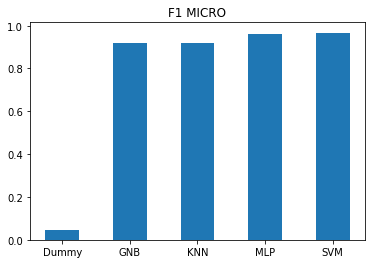

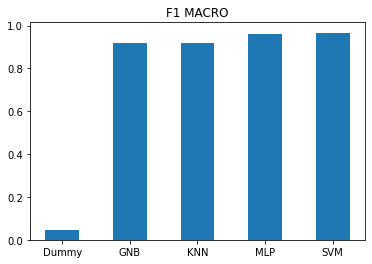

In [ ]:
import matplotlib.pyplot as plt 

clfs = ['Dummy', 'GNB', 'KNN', 'MLP', 'SVM']
f1_micro = [dummy_opt_f1_micro, gnb_opt_f1_micro, knn_opt_f1_micro, mlp_opt_f1_micro, svc_opt_f1_micro]
f1_macro = [dummy_opt_f1_macro, gnb_opt_f1_macro, knn_opt_f1_macro, mlp_opt_f1_macro, svc_opt_f1_macro]

plt.figure()
plt.title("F1 MICRO")
plt.bar(clfs, f1_micro, width=0.5)
plt.show()
plt.close()

plt.figure()
plt.title("F1 MACRO")
plt.bar(clfs, f1_macro, width=0.5)
plt.show()
plt.close()

Από το παραπάνω διάγραμμα αξίζει να δούμε ότι ο ταξινομητής **GNB** είναι ξεπερνάει σχεδόν τον **kNN** στη βέλτιστη εκδοχή του. Το γεγονός αυτό είναι ενδιαφέρον καθώς στις αρχικές εκδόσεις ο **GNB** ήταν σημαντικά χειρότερος από τον **kNN**. Μπορούμε έτσι να δούμε τη χρησιμότητα της προεπεξεργασίας των δεδομένων για τις αποδόσεις ενός συστήματος. Ανατρέχοντας και στα χρονικά αποτελέσματα, ο **GNB** είναι ένας πολύ γρήγορος αλγόριθμος (μαζί με την προεργασία), με απλή λειτουργία, που πετυχαίνει πολύ ικανοποιητική επίδοση ακόμα και σε σύγκριση με τη βέλτιστη.

#### Επίδοση βελτιστοποίησης

In [ ]:
print ("Μεταβολές επίδοσης των βελτιστοποιήμενων εκδόσεων από τις προηγούμενες :")
print()
print("Metric     | Dummy Classifier     | Gaussian Naive Bayes | K-Nearest Neighbors  | Multi-Layer Perceptron | Support Vector Machines")
print("----------------------------------------------------------------------------------------------------------------------------------")
print("f1_micro   | {} | {}   | {} | {}   | {}".format(dummy_opt_f1_micro - dummy_f1_micro, gnb_opt_f1_micro - gnb_f1_micro, knn_opt_f1_micro - knn_f1_micro, mlp_opt_f1_micro - mlp_f1_micro, svc_opt_f1_micro - svc_f1_micro))
print("f1_macro   | {} | {}  | {} | {}  | {}".format(dummy_opt_f1_macro - dummy_f1_macro, gnb_opt_f1_macro - gnb_f1_macro, knn_opt_f1_macro - knn_f1_macro, mlp_opt_f1_macro - mlp_f1_macro, svc_opt_f1_macro - svc_f1_macro))

Μεταβολές επίδοσης των βελτιστοποιήμενων εκδόσεων από τις προηγούμενες :

Metric     | Dummy Classifier     | Gaussian Naive Bayes | K-Nearest Neighbors  | Multi-Layer Perceptron | Support Vector Machines
----------------------------------------------------------------------------------------------------------------------------------
f1_micro   | 0.006410256410256401 | 0.1119658119658119   | 0.024358974358974272 | 0.002991452991452981   | 0.009829059829059794
f1_macro   | 0.006039622782159276 | 0.11579683164475141  | 0.024614342452131788 | 0.0030925026205379513  | 0.00989843519186595


Αν εξαιρέσουμε τον **Dummy** ταξινομητή, μπορούμε να δούμε ότι η βελτίωση της επίδοσης μειώνεται όσο αυξάνεται η πολυπλοκότητα του ταξινομητή. Από μία άλλη σκοπιά, η επίδοση των βελτιστοποιημένων ταξινομητών έχει αυξηθεί σημαντικά σε όσους ταξινομητές δεν πετύχαιναν εξ' αρχής πολύ καλές επιδόσεις. Επιστρέφουμε, λοιπόν, στο συμπέρασμά μας σχετικά με τη βέλτιστη δυνατή επίδοση που μπορεί να έχει ένας ταξινομητής σε αυτό το dataset. θεωρούμε πιθανό η μη περαιτέρω βελτίωση να οφείλεται σε αυτό ακριβώς το γεγονός, ότι δηλαδή δε γίνεται να την αυξήσουμε περισσότερο.

Επιπλέον, καταλήγουμε στο συμπέρασμα ότι η προεπεξεργασία των δεδομένων είναι σημαντική για τους περισσότερο απλούς ταξινομητές.

#### Other Metrics

In [ ]:
print ("Dummy Classifier")
print(classification_report(test_labels, dummy_opt_preds, target_names=label_names))
print ("Gaussian Naive Bayes")
print(classification_report(test_labels, gnb_opt_preds, target_names=label_names))
print ("K-Nearest Neihgbors")
print(classification_report(test_labels, knn_opt_preds, target_names=label_names))
print ("Multi-Layer Perceptron")
print(classification_report(test_labels, mlp_opt_preds, target_names=label_names))
print ("Support Vector Machines")
print(classification_report(test_labels, svc_opt_preds, target_names=label_names))

Dummy Classifier
              precision    recall  f1-score   support

           A       0.02      0.02      0.02        90
           B       0.04      0.04      0.04        90
           C       0.03      0.03      0.03        90
           D       0.05      0.06      0.05        90
           E       0.05      0.06      0.05        90
           F       0.06      0.07      0.06        89
           G       0.05      0.06      0.05        90
           H       0.07      0.07      0.07        90
           I       0.07      0.07      0.07        90
           J       0.06      0.06      0.06        90
           K       0.03      0.03      0.03        90
           L       0.04      0.03      0.03        90
           M       0.02      0.02      0.02        89
           N       0.05      0.06      0.05        90
           O       0.04      0.04      0.04        90
           P       0.03      0.02      0.02        90
           Q       0.03      0.03      0.03        90
          

Τελευταία παρατήρηση που μπορεί να προκύψει βλέποντας το σύνολο των μετρικών αξιολόγησης είναι ότι σε αυτό το σύνολο δεδομένων οι διάφορες μετρικές δε μας δίνουν σημαντικά διαφορετική πληροφορία. Το γεγονός αυτό οφείλεται στο ότι το dataset είναι ισορροπημένο.